# **Data Analysis Part 2**

## Objectives

- Construct plots to validate the primary hypotheses, as laid out in the project ReadMe

## Inputs
- outputs/datasets/collection/student-exam-results.csv file

## Outputs
- Plots
- Better understanding of how each of the categorical variables influences the numerical variables
- Validation of primary hypotheses

## Import Packages

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import pingouin as pg
sns.set_theme(style="whitegrid")
sns.set(rc={'figure.figsize':(11.7,8.27)})
%matplotlib inline

# Change working directory

Since this notebook exists in the jupyter_notebooks directory, we need to change the current working directory from the jupyter_notebooks directory to the workspace, so that any directories created in further codes cells are added in the correct place. 

We access the current directory with the OS packages' `getcwd()` method

In [1]:
current_directory = os.getcwd()
current_directory

'/workspace/Exam-Scores-Analysis/jupyter_notebooks'

We now want to set the working directory as the parent of the current working directory, jupyter_notebooks

- The `os.path.dirname()` method gets the parent directory
- The `os.chir()` method defines the new current directory
- We do this to access all of the project's files and directories, rather than those in the jupyter_notebooks directory

In [2]:
os.chdir(os.path.dirname(current_directory))
print("You set a new current directory")

You set a new current directory


To make certain of things, we now use a code cell to confirm that we have set the current working directory properly

In [3]:
current_directory = os.getcwd()
current_directory

'/workspace/Exam-Scores-Analysis'

## Load Data

In [5]:
df = pd.read_csv('outputs/datasets/collection/student-exam-results.csv')
df.head()

,gender,ethnicity,parental_education,lunch_program,test_preparation_course,math_score,reading_score,writing_score,average_score
0,male,group A,high school,standard,completed,67,67,63,65
1,female,group D,some high school,free/reduced,none,40,59,55,51
2,male,group E,some college,free/reduced,none,59,60,50,56
3,male,group B,high school,standard,none,77,78,68,74
4,male,group E,associate's degree,standard,completed,78,73,68,73


## Outline

This notebook will focus on generating the evidence necessary to validate our primary hypotheses. These are laid down in the project [ReadMe](https://github.com/AdamBoley/Exam-Scores-Analysis#readme), but are repeated here for fullness and clarity:

- I hypothesize that a student's gender has an effect on their individual and overall test scores

- I hypothesize that a student's ethnicity has an effect on their individual and overall test scores

- I hypothesize that increased levels of parental education correlate with higher test scores. For this hypothesis, I have made the reasonable assumption that better educated parents have a greater focus on education

- I hypothesize that a student's lunch program has an effect on their test scores

- I hypothesize that students who attend the test preparation course attain higher test scores

## Gender relationships

We now wish to see how the gender column influences the score columns. We can begin the validate the first hypothesis - that a student's gender has an effect on their test scores.

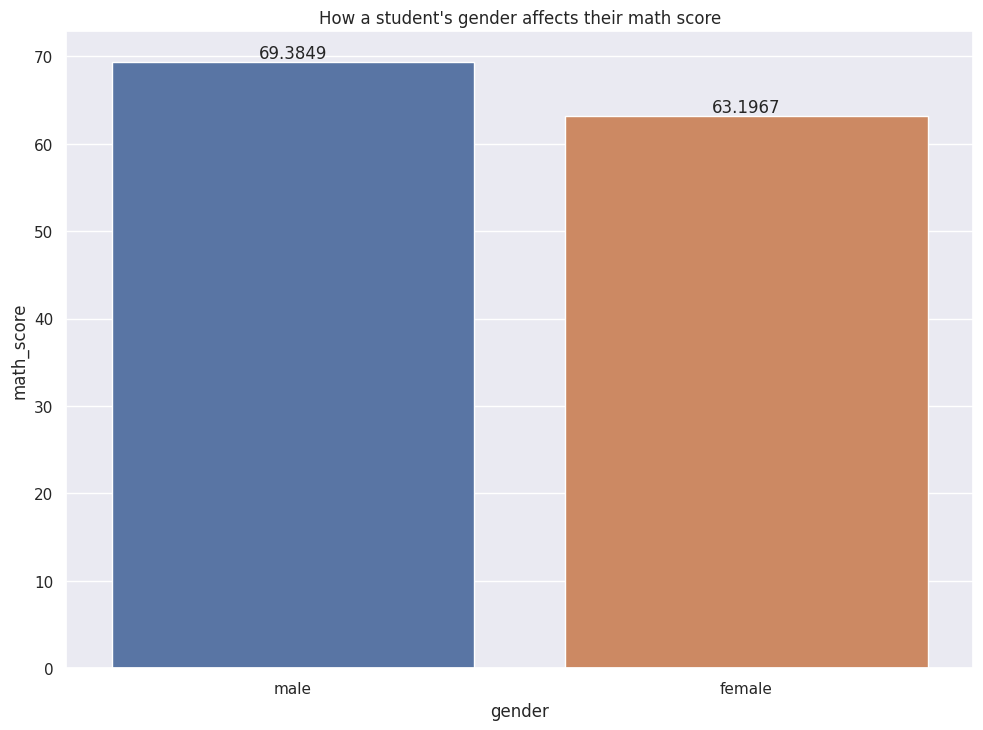

In [6]:
fig_gender_maths = sns.barplot(data=df, x='gender', y='math_score', errorbar=None)
plt.title("How a student's gender affects their math score")
plt.bar_label(fig_gender_maths.containers[0])
plt.show()

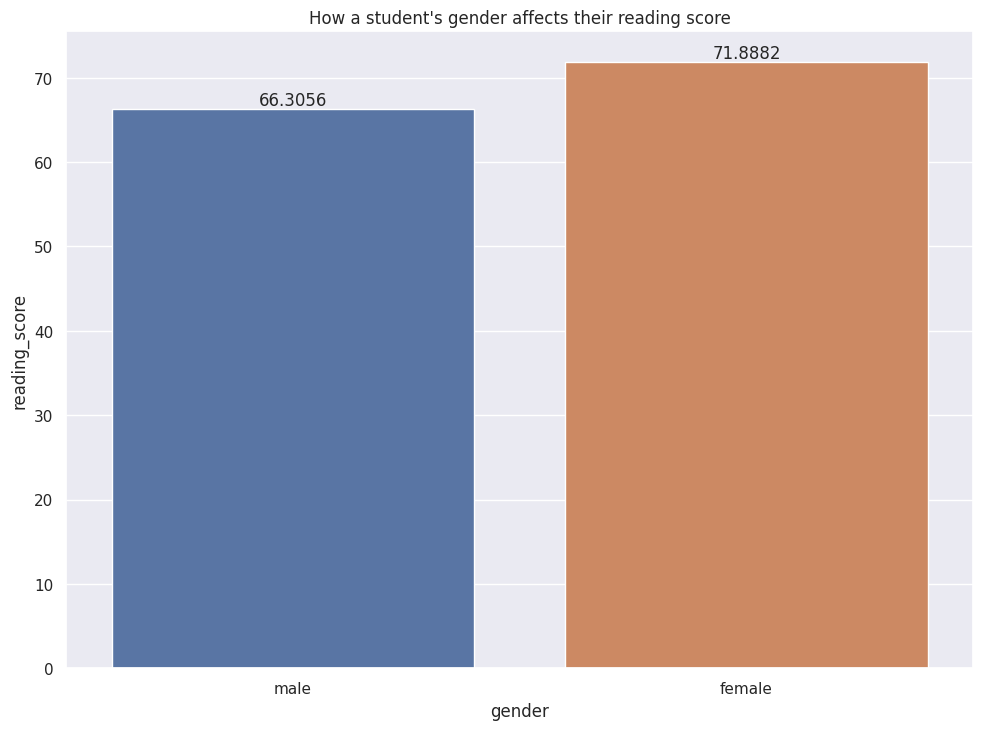

In [7]:
fig_gender_reading = sns.barplot(data=df, x='gender', y='reading_score', errorbar=None)
plt.title("How a student's gender affects their reading score")
plt.bar_label(fig_gender_reading.containers[0])
plt.show()

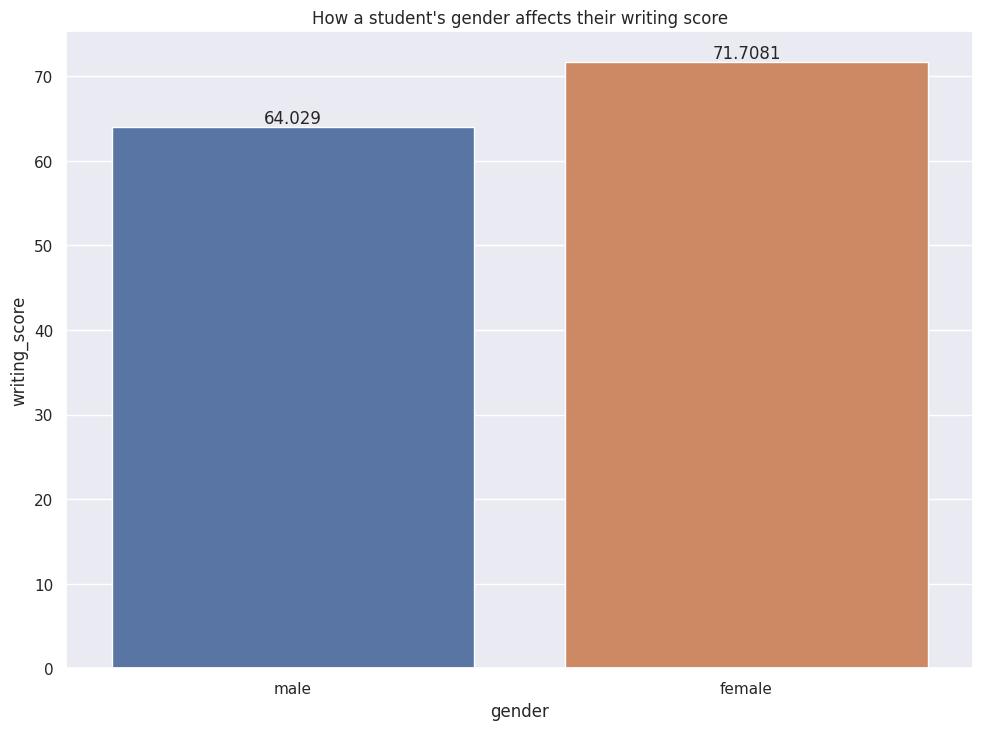

In [8]:
fig_gender_writing = sns.barplot(data=df, x='gender', y='writing_score', errorbar=None)
plt.title("How a student's gender affects their writing score")
plt.bar_label(fig_gender_writing.containers[0])
plt.show()

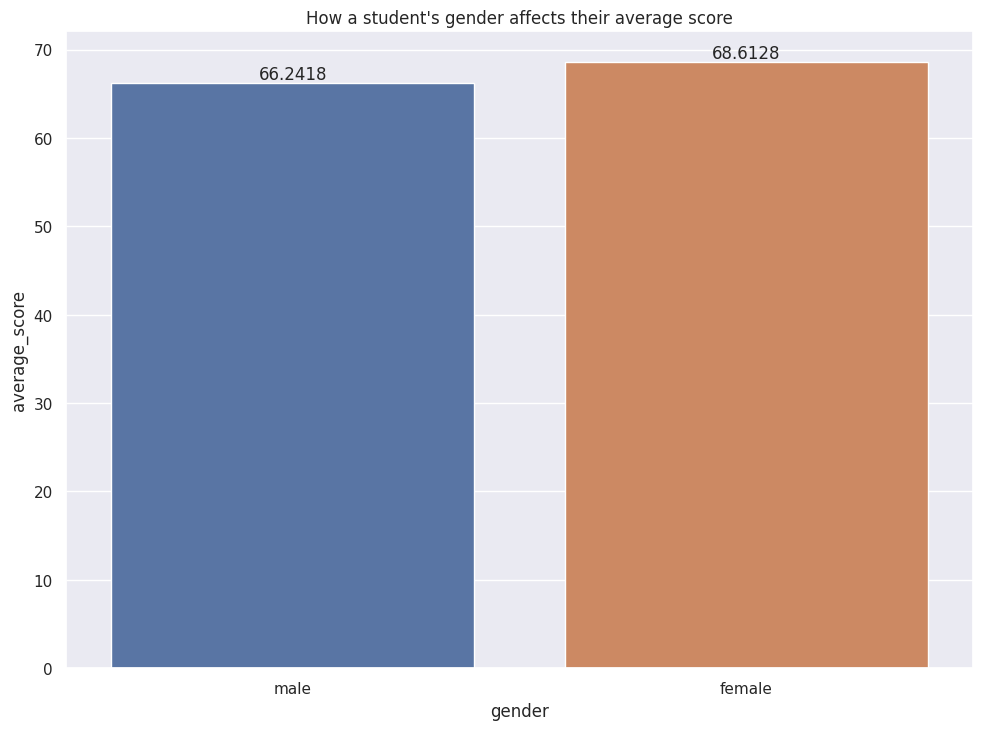

In [9]:
fig_gender_average = sns.barplot(data=df, x='gender', y='average_score', errorbar=None)
plt.title("How a student's gender affects their average score")
plt.bar_label(fig_gender_average.containers[0])
plt.show()

This is a very interesting series of plots. It indicates that male students outperform female students in mathematics, whereas female students outperform male students in reading and writing. The two groups are more equal in performance when their scores are averaged, though female students still outperform male students.
In total:
- Males outperform females in maths by 6 points
- Females outperform males in reading by 5.5 points
- Females outperform males in writing by 7.5 points
- Females outperform males on average by 2 points

## Ethnicity relationships

We can now investigate how a student's ethnicity affects their test scores. We can begin the validate the hypothesis that a student's ethnicity affects their test scores.

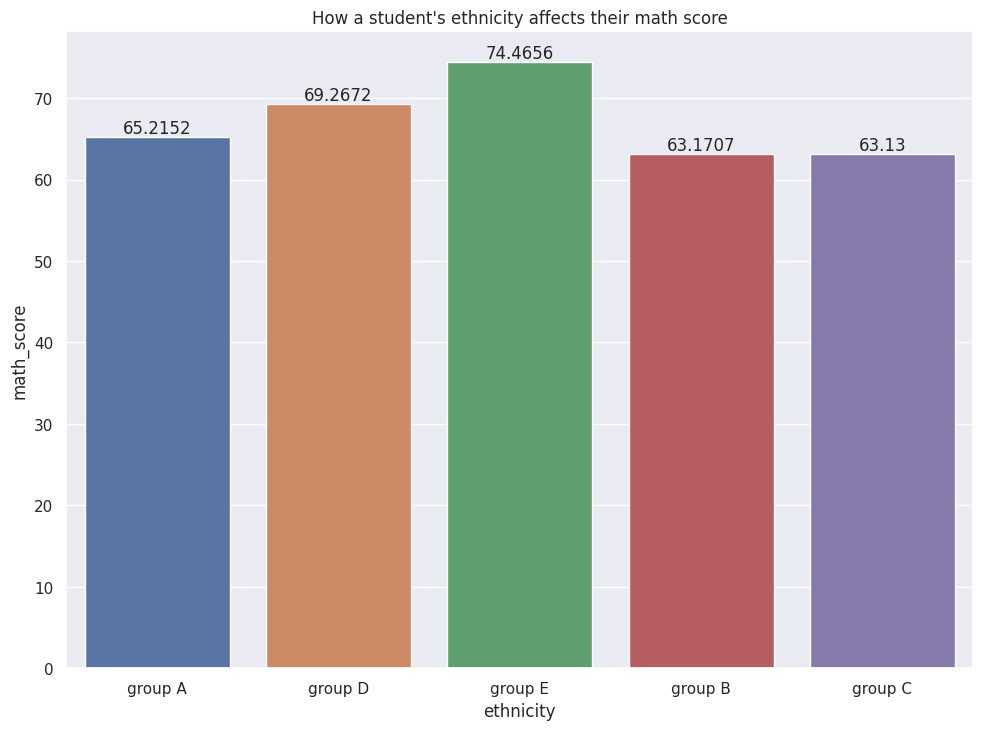

In [10]:
fig_ethnicity_maths = sns.barplot(data=df, x='ethnicity', y='math_score', errorbar=None)
plt.title("How a student's ethnicity affects their math score")
plt.bar_label(fig_ethnicity_maths.containers[0])
plt.show()

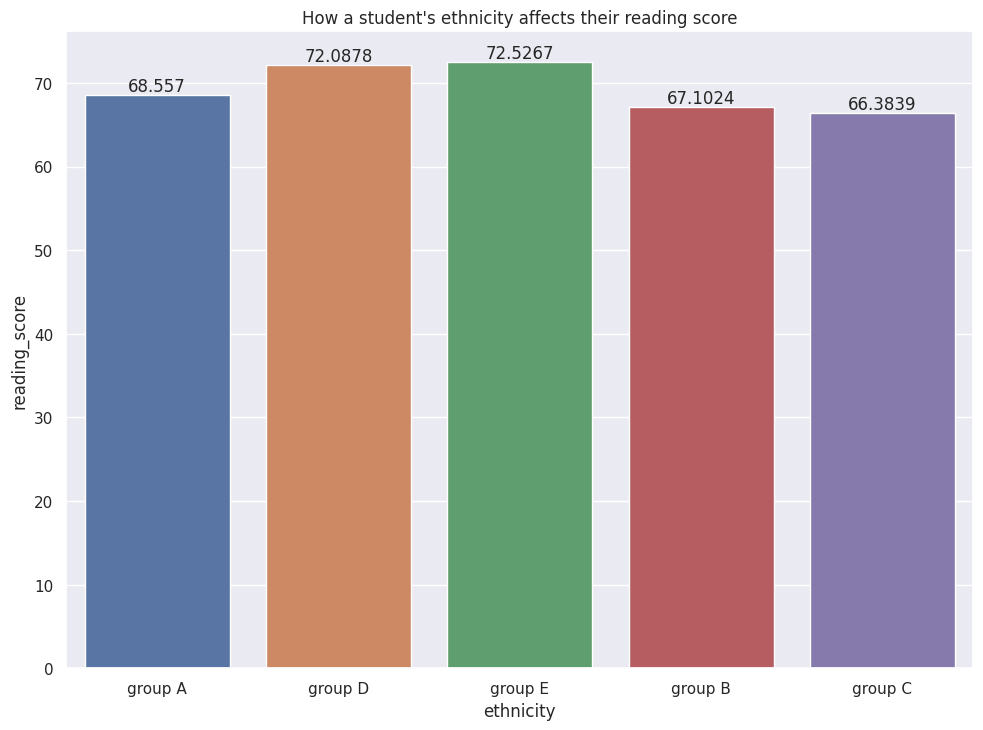

In [11]:
fig_ethnicity_reading = sns.barplot(data=df, x='ethnicity', y='reading_score', errorbar=None)
plt.title("How a student's ethnicity affects their reading score")
plt.bar_label(fig_ethnicity_reading.containers[0])
plt.show()

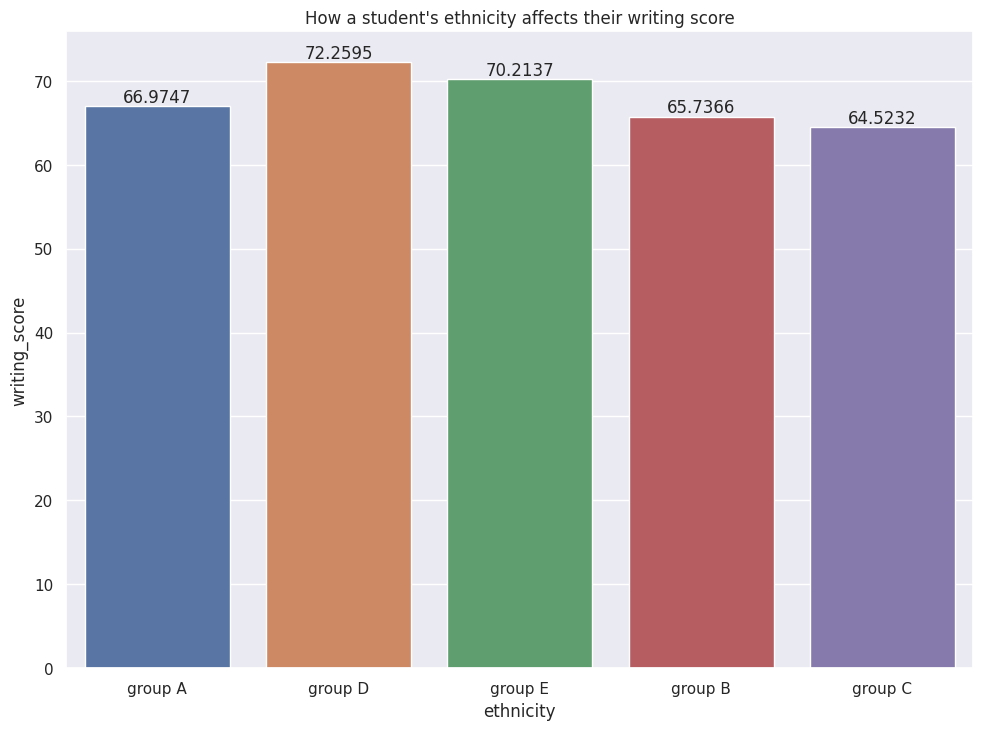

In [12]:
fig_ethnicity_writing = sns.barplot(data=df, x='ethnicity', y='writing_score', errorbar=None)
plt.title("How a student's ethnicity affects their writing score")
plt.bar_label(fig_ethnicity_writing.containers[0])
plt.show()

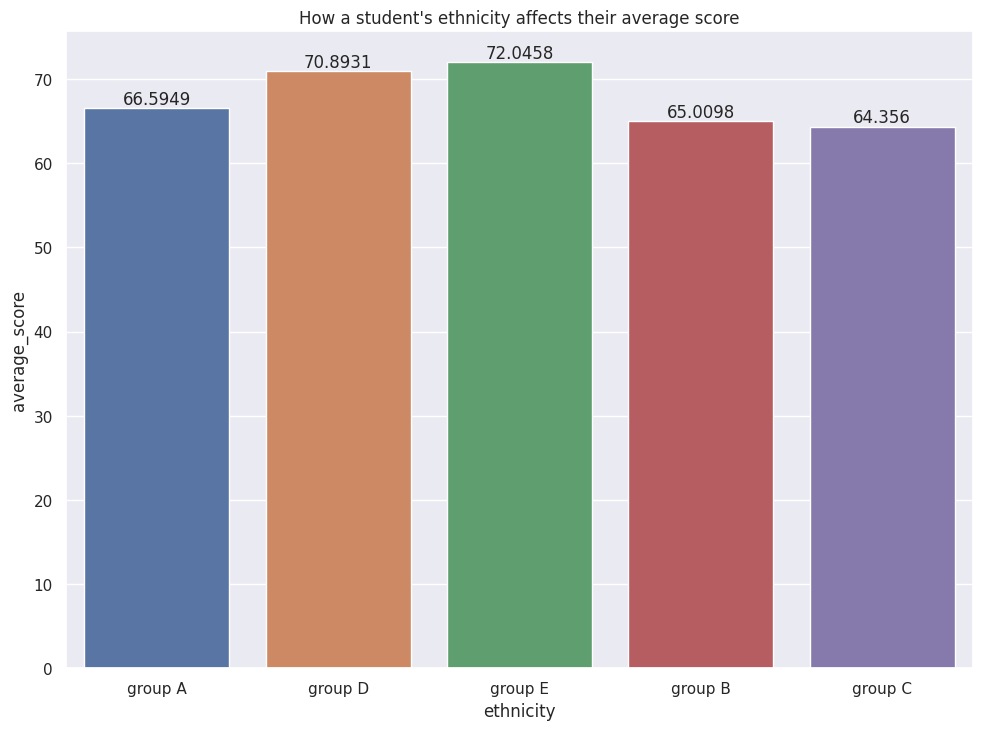

In [13]:
fig_ethnicity_average = sns.barplot(data=df, x='ethnicity', y='average_score', errorbar=None)
plt.title("How a student's ethnicity affects their average score")
plt.bar_label(fig_ethnicity_average.containers[0])
plt.show()

This is another interesting series of plots. Ethnic group E appears to perform very well generally, and in mathematics particularly. Ethnic group D also performs well generally, matching Group E, and overtaking in writing. Ethnic Group A performs 3rd best. Ethnic Groups B and C are generally tied in performance, and perform the worst. Because we have 5 ethnicities, describing every relationship exhaustively is pointless. Instead we can describe the difference between the best and worst performing ethnicities:
- In maths, Group E outperforms by 11 points
- In reading, Group E outperforms by 6 points
- In writing, Group D outperforms by 6.5 points
- On average, Group E outperforms by 8 points
- Overall, we can say that ethnicity has a noticeable effect on test scores

Note that here I am merely describing trends. Since our overall goal is to show patterns in the data to help inform education policy, it is not my intention to be racist in any way. I spoke to my Mentor about this, and he indicated that as scientists, we should not shy away from presenting and discussing the truth, no matter how uncomfortable it is.

## Parental Education relationships

We can now begin to investigate how the level of parental education of a student affects a student's test scores. We can begin to validate the hypothesis that increased levels of parental education correlate with increased test scores.

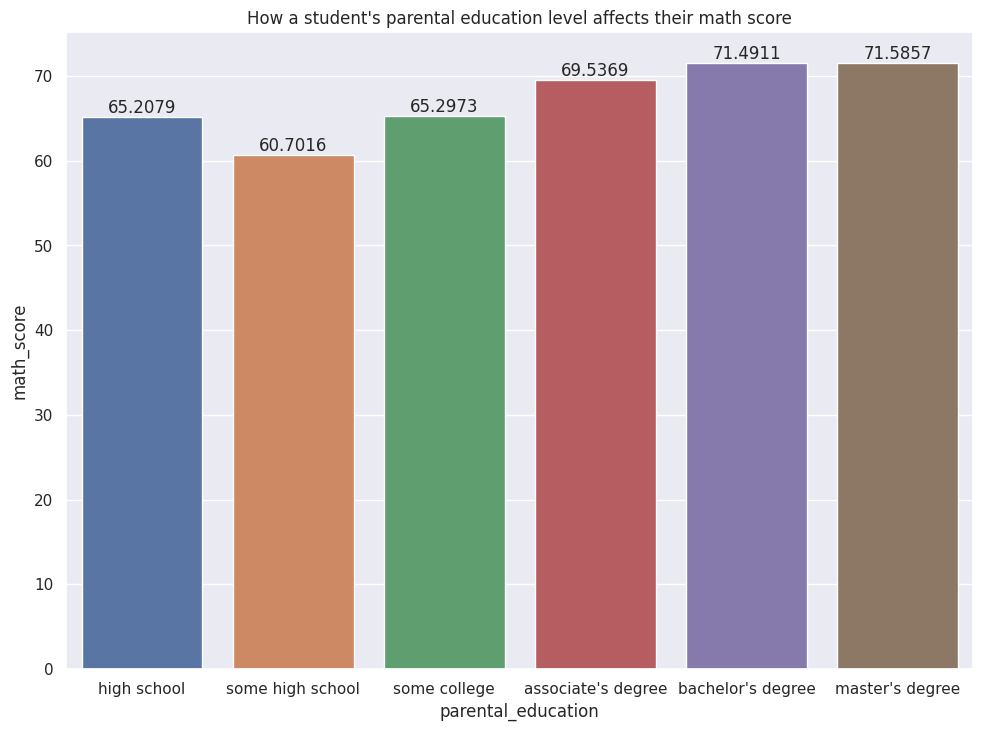

In [14]:
fig_parental_maths = sns.barplot(data=df, x='parental_education', y='math_score', errorbar=None)
plt.title("How a student's parental education level affects their math score")
plt.bar_label(fig_parental_maths.containers[0])
plt.show()

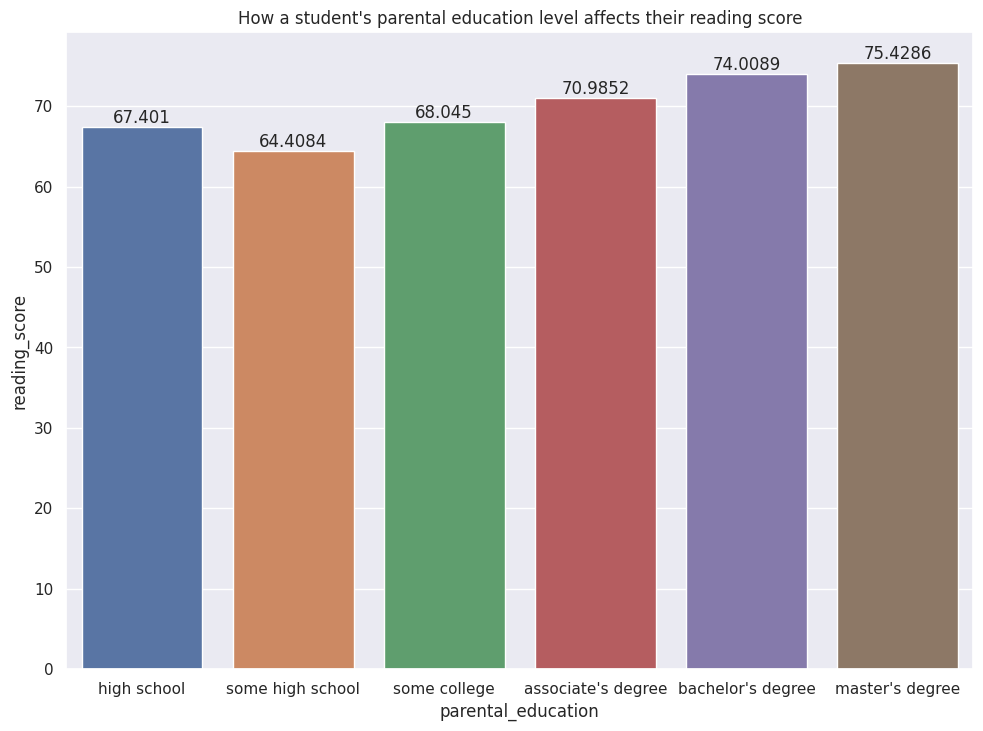

In [15]:
fig_parental_reading = sns.barplot(data=df, x='parental_education', y='reading_score', errorbar=None)
plt.title("How a student's parental education level affects their reading score")
plt.bar_label(fig_parental_reading.containers[0])
plt.show()

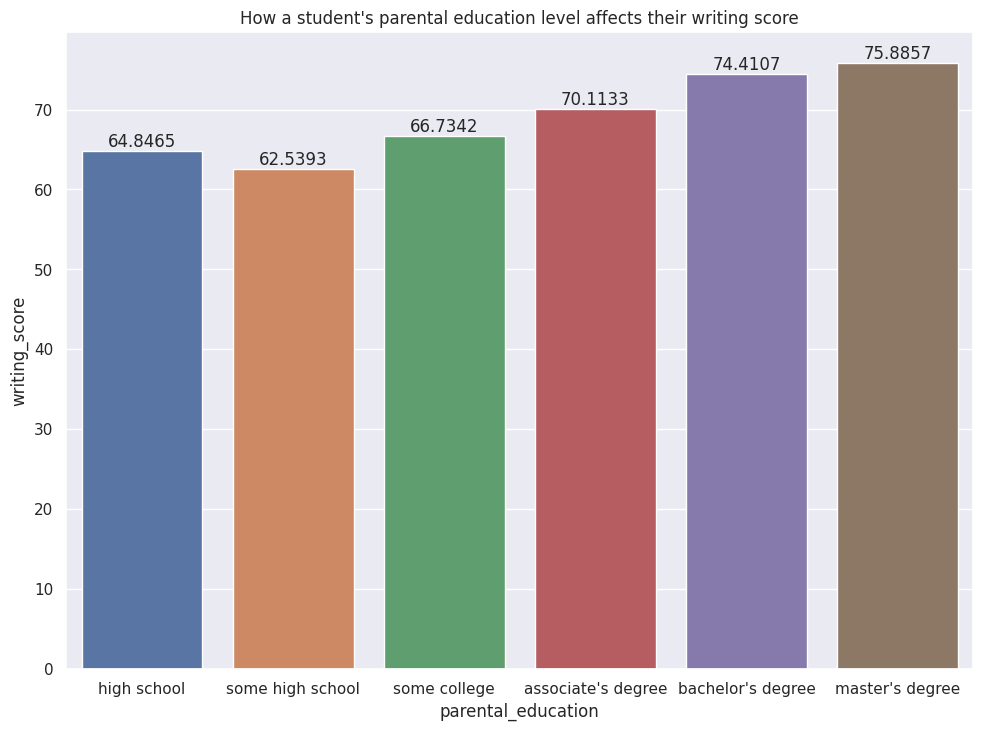

In [16]:
fig_parental_writing = sns.barplot(data=df, x='parental_education', y='writing_score', errorbar=None)
plt.title("How a student's parental education level affects their writing score")
plt.bar_label(fig_parental_writing.containers[0])
plt.show()

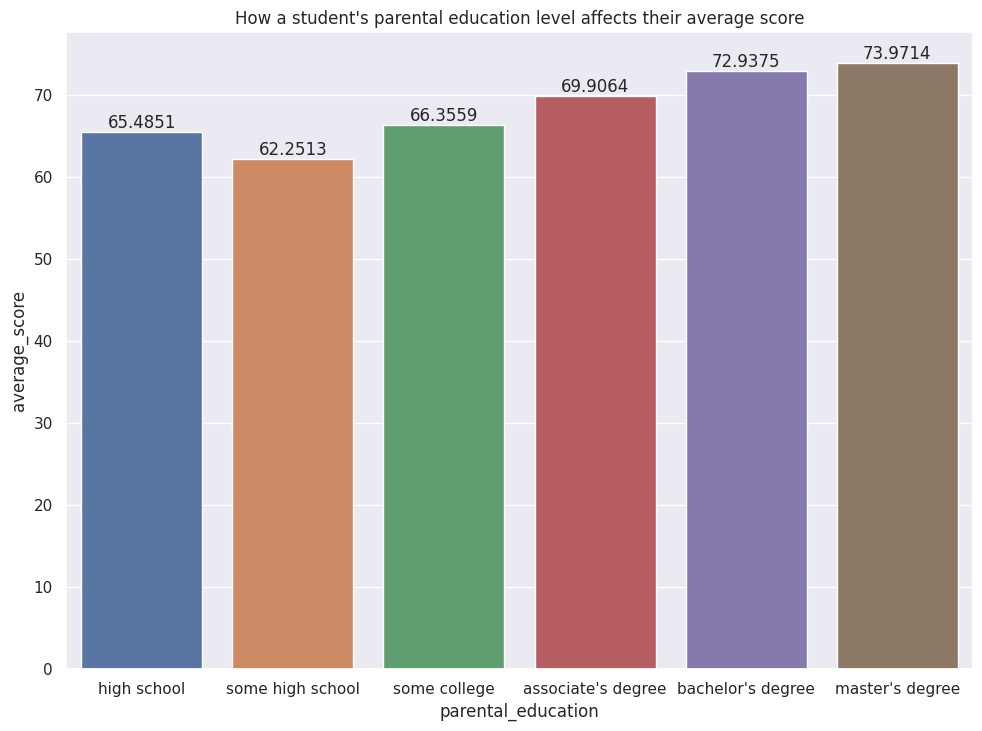

In [17]:
fig_parental_average = sns.barplot(data=df, x='parental_education', y='average_score', errorbar=None)
plt.title("How a student's parental education level affects their average score")
plt.bar_label(fig_parental_average.containers[0])
plt.show()

From this series of plots, we see that our hypothesis is validated - parental education has a large effect on student test scores. Students whose parents have only some high school education perform less well than their peers. This is particularly true of mathematics, where performance is significantly worse. As parental education rises from high school to some college to an associates degree to a bachelors degree, student test scores increase. However, once a parent achieves a masters degree, student test score performance does not rise appreciably.

As above, because we have 5 categories, exhaustively describing the relationships would be pointless. However, we can describe the differences between students with the most highly educated parents and those with the least educated parents. We can also describe the differences between the students with parents with only some high school education and those students with parents who have completed high school, so as to illustrate the difference that even a minimal amount of education has. 

Between some high school and bachelors degree / masters degree:
- In maths, the difference is 11 points
- In reading, the difference is 11 points
- In writing, the difference is 13 points
- on average, the difference is 12 points

Between some high school and high school:
- In maths, the difference is 4.5 points
- In reading, the difference is 3 points
- In writing, the difference is 2 points
- On average, the difference is 3 points

## Lunch program relationships

We can now investigate the relationship between a student's lunch program and their test scores. We can begin to validate the hypothesis that a student's lunch program affects their test scores.

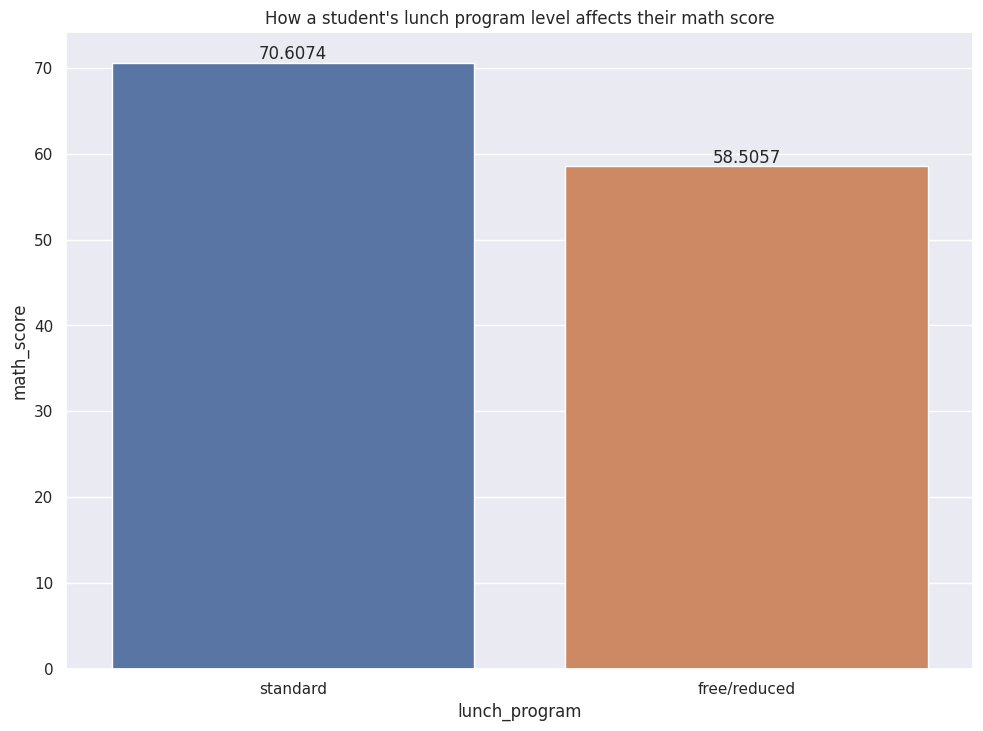

In [18]:
fig_lunch_maths = sns.barplot(data=df, x='lunch_program', y='math_score', errorbar=None)
plt.title("How a student's lunch program level affects their math score")
plt.bar_label(fig_lunch_maths.containers[0])
plt.show()

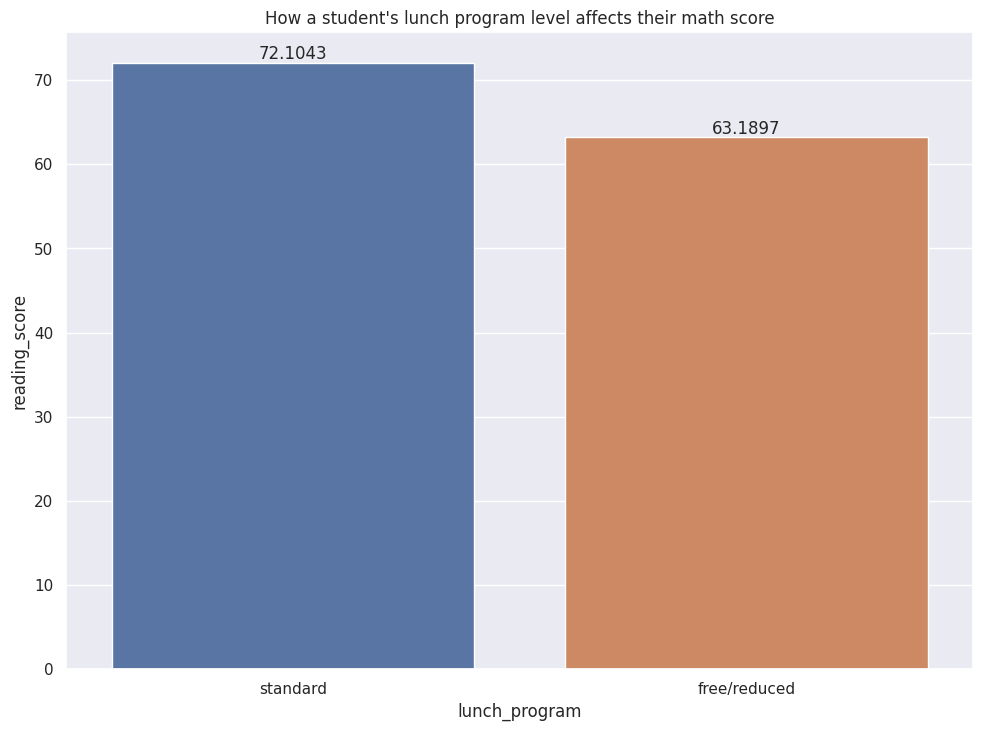

In [19]:
fig_lunch_reading = sns.barplot(data=df, x='lunch_program', y='reading_score', errorbar=None)
plt.title("How a student's lunch program level affects their math score")
plt.bar_label(fig_lunch_reading.containers[0])
plt.show()

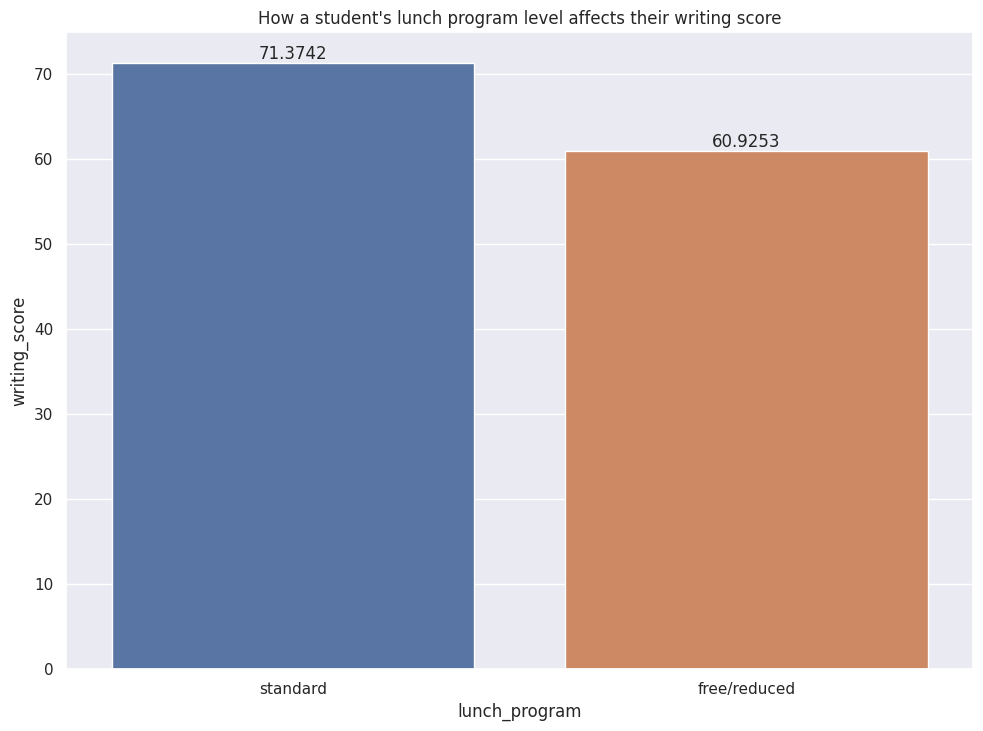

In [20]:
fig_lunch_writing = sns.barplot(data=df, x='lunch_program', y='writing_score', errorbar=None)
plt.title("How a student's lunch program level affects their writing score")
plt.bar_label(fig_lunch_writing.containers[0])
plt.show()

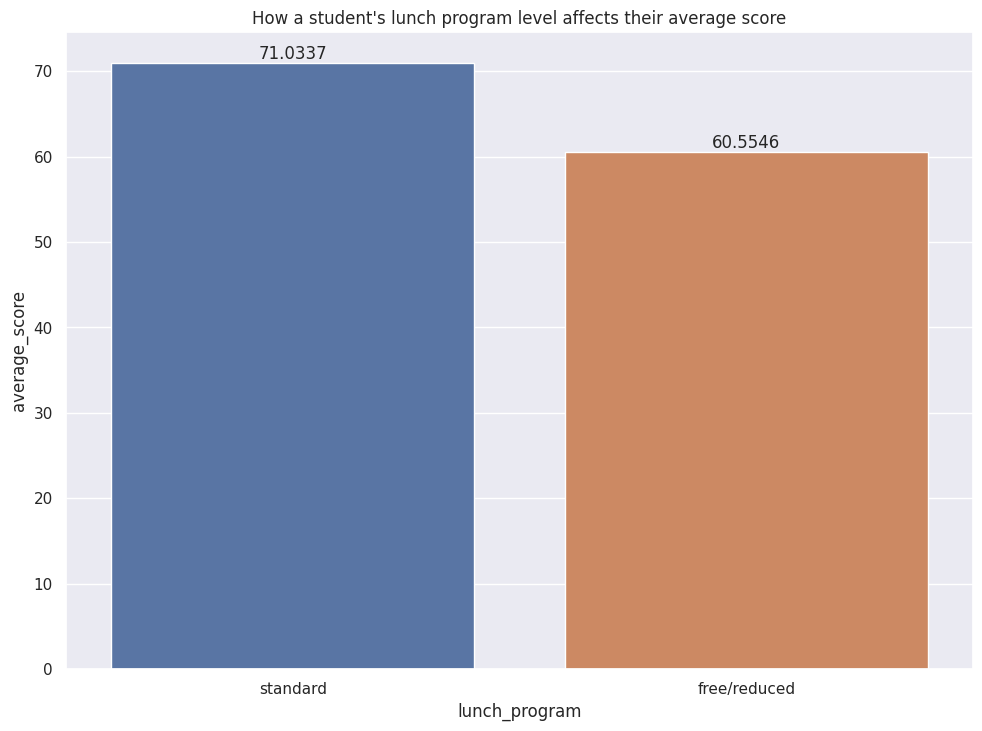

In [21]:
fig_lunch_average = sns.barplot(data=df, x='lunch_program', y='average_score', errorbar=None)
plt.title("How a student's lunch program level affects their average score")
plt.bar_label(fig_lunch_average.containers[0])
plt.show()

This is a very interesting series of plots - a student's lunch program has a massive effect on their test scores. Those students on the free/reduced program perform significantly worse than their peers on the standard lunch program. Since we know that less-educated parents correlate to lower test scores, and we now know that students on the free/reduced lunch program also have lower test scores, it would be interesting to investigate whether less educated parents have students who are in the free/reduced lunch program. 

As we have 2 categories, we can describe the relationships:
- In maths, the difference is 12 points
- In reading, the difference is 9 points
- In writing, the difference is 10 points
- On average, the difference the 10.5 points

## Test Preparation Course relationships

We can now investigate the effect that the test preparation course has on student test scores. We can begin to validate the hypothesis that the test preparation course improves student test scores. 

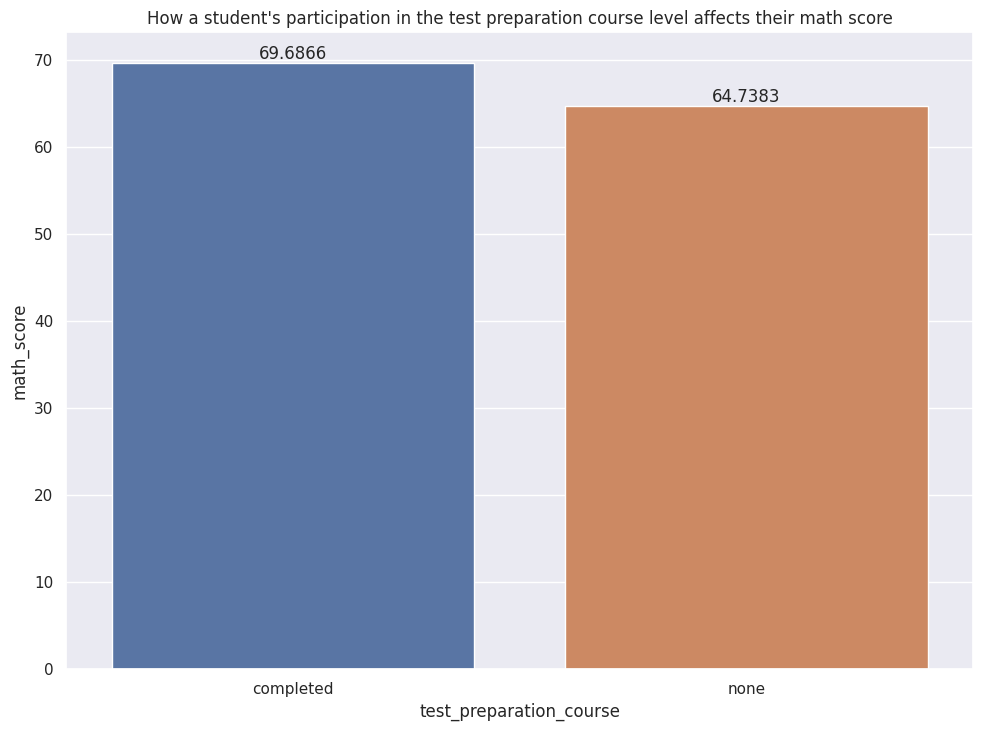

In [22]:
fig_test_maths = sns.barplot(data=df, x='test_preparation_course', y='math_score', errorbar=None)
plt.title("How a student's participation in the test preparation course level affects their math score")
plt.bar_label(fig_test_maths.containers[0])
plt.show()

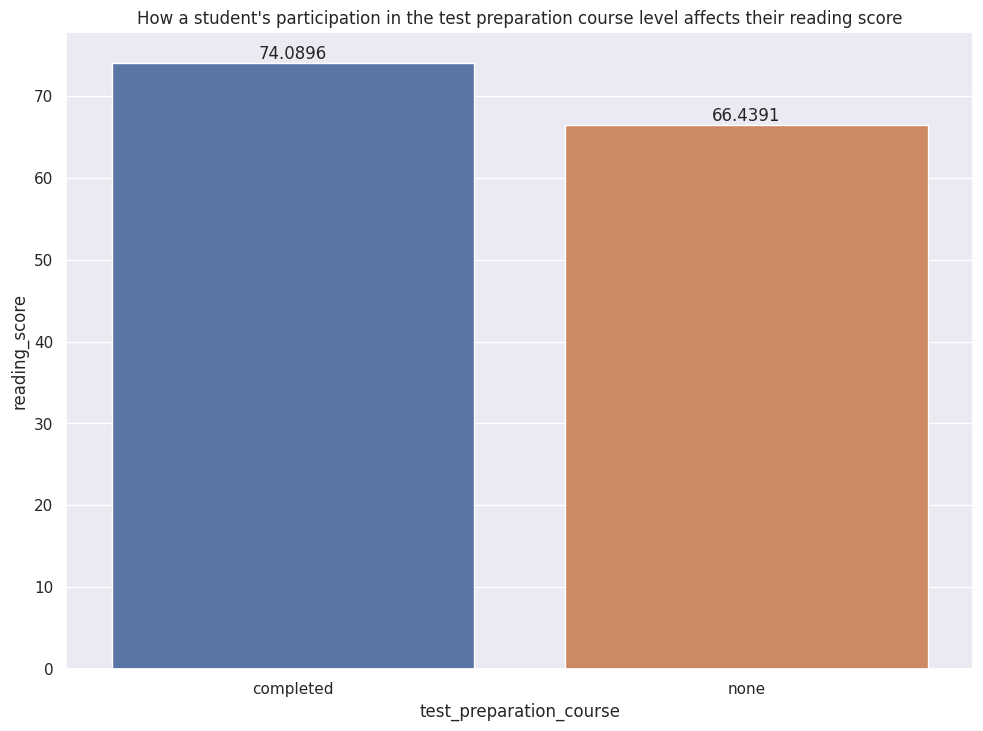

In [23]:
fig_test_reading = sns.barplot(data=df, x='test_preparation_course', y='reading_score', errorbar=None)
plt.title("How a student's participation in the test preparation course level affects their reading score")
plt.bar_label(fig_test_reading.containers[0])
plt.show()

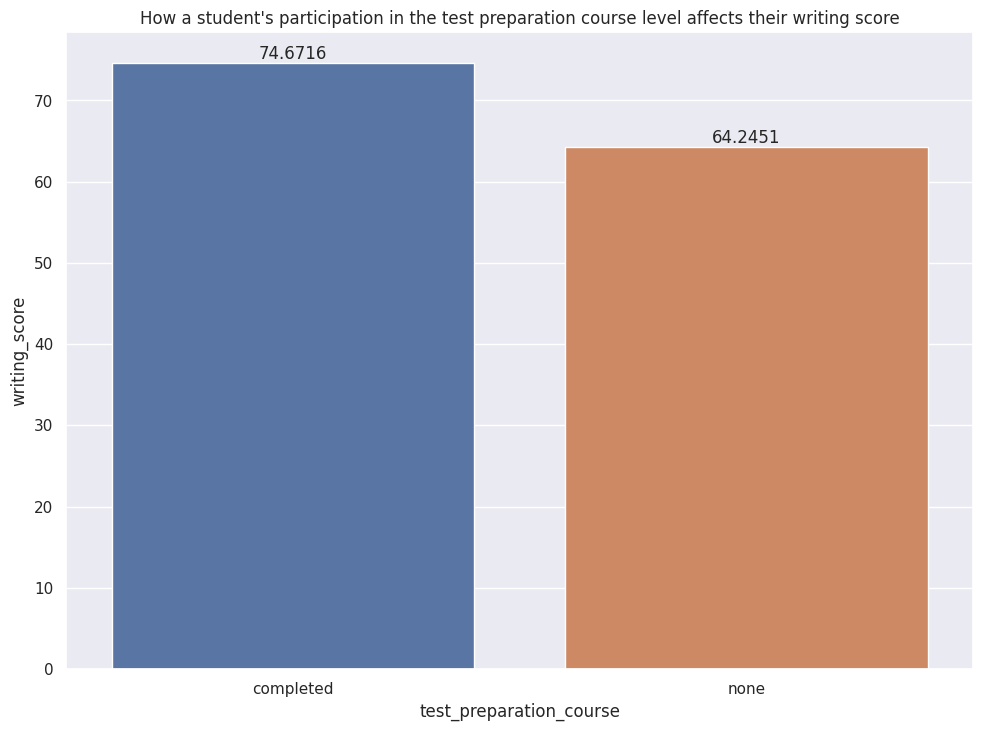

In [24]:
fig_test_writing = sns.barplot(data=df, x='test_preparation_course', y='writing_score', errorbar=None)
plt.title("How a student's participation in the test preparation course level affects their writing score")
plt.bar_label(fig_test_writing.containers[0])
plt.show()

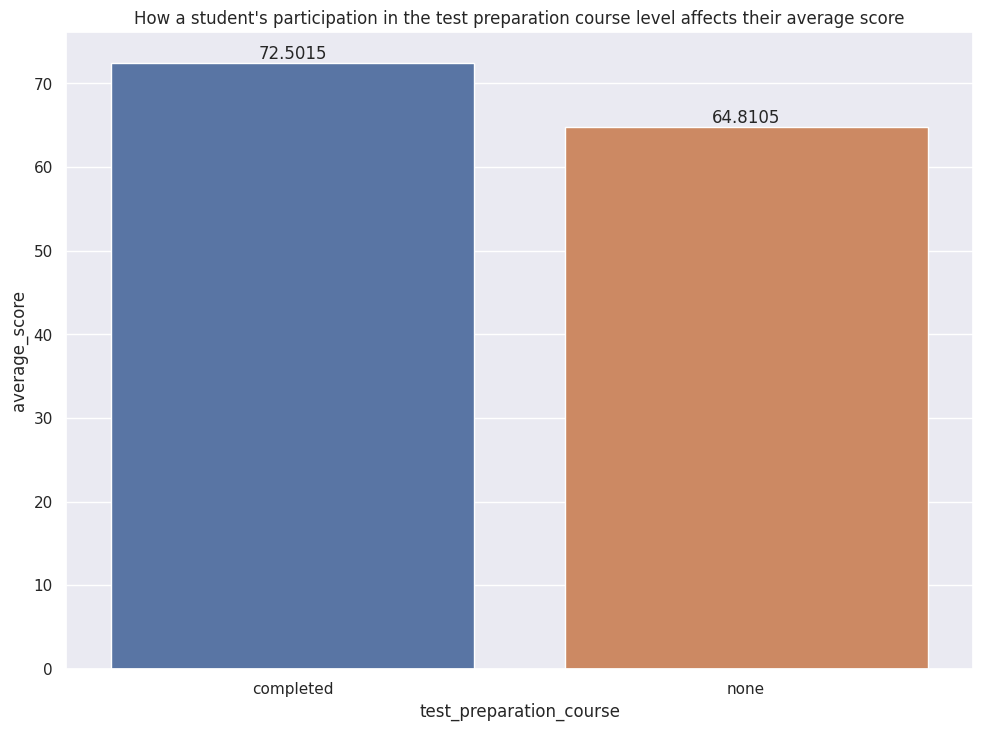

In [25]:
fig_test_average = sns.barplot(data=df, x='test_preparation_course', y='average_score', errorbar=None)
plt.title("How a student's participation in the test preparation course level affects their average score")
plt.bar_label(fig_test_average.containers[0])
plt.show()

As we suspected, students who complete the test preparation course achieve significantly higher test scores. We can now successfully validate that hypothesis. As we have 2 categories, we can describe the relationships:
- In maths, the difference is 5 points
- In reading, the difference is 8 points
- In writing, the difference is 10 points
- On average, the difference is 8 points

## Discussion

We now a reasonably clear picture of what affects student test scores.

Lower performing students tend to be male (except in the case of mathematics), belong to ethnic groups B or C, have parents that only have some high school education, participate in the free/reduced lunch program and do not complete the test preparation course.

Higher performing students tend to be female (except in the cases of reading and writing), belong to ethnic groups D and E, have parents with bachelors and masters degrees, do not participate in the free/reduced lunch program and undertake the test preparation course.

## Save plots

We will now save these plots for use within the Streamlit dashboard. First, the plots of how the exam scores break down by gender

### Gender - Score plots

In [26]:
try:
  os.makedirs(name='outputs/plots/gender') # create outputs/plots/gender folder
except Exception as e:
  print(e)

filepath_gender = 'outputs/plots/gender'

[Errno 17] File exists: 'outputs/plots/gender'


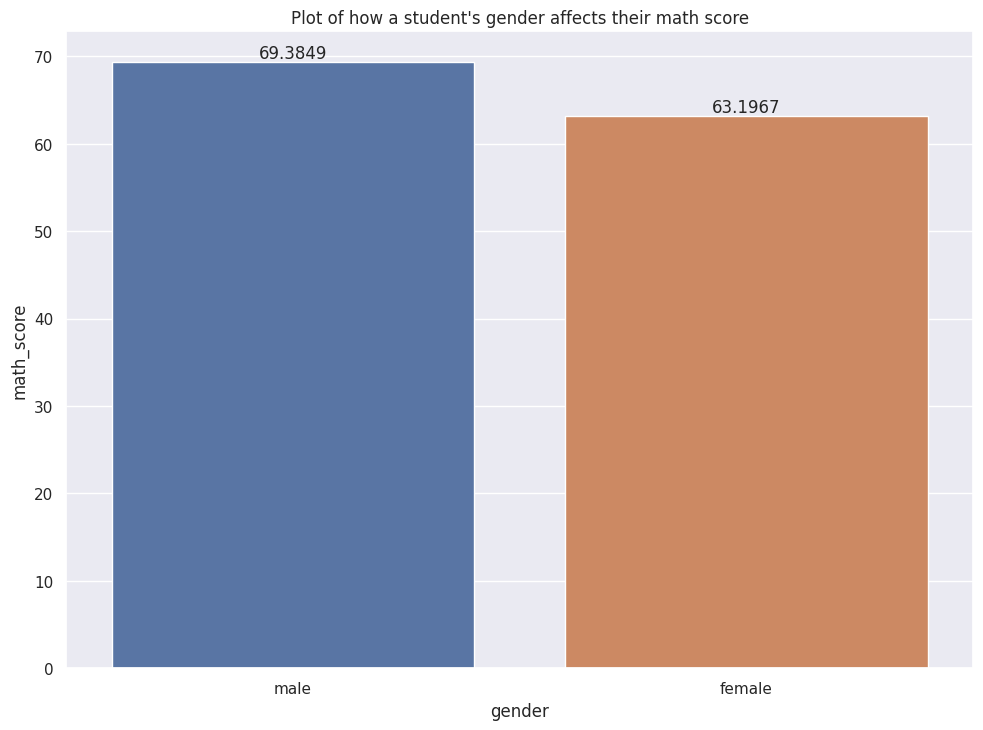

In [27]:
! rm outputs/plots/gender/gender-maths-plot.png

fig_gender_maths = sns.barplot(data=df, x='gender', y='math_score', errorbar=None)
plt.bar_label(fig_gender_maths.containers[0])
plt.title("Plot of how a student's gender affects their math score")
plt.savefig(f'{filepath_gender}/gender-maths-plot.png')

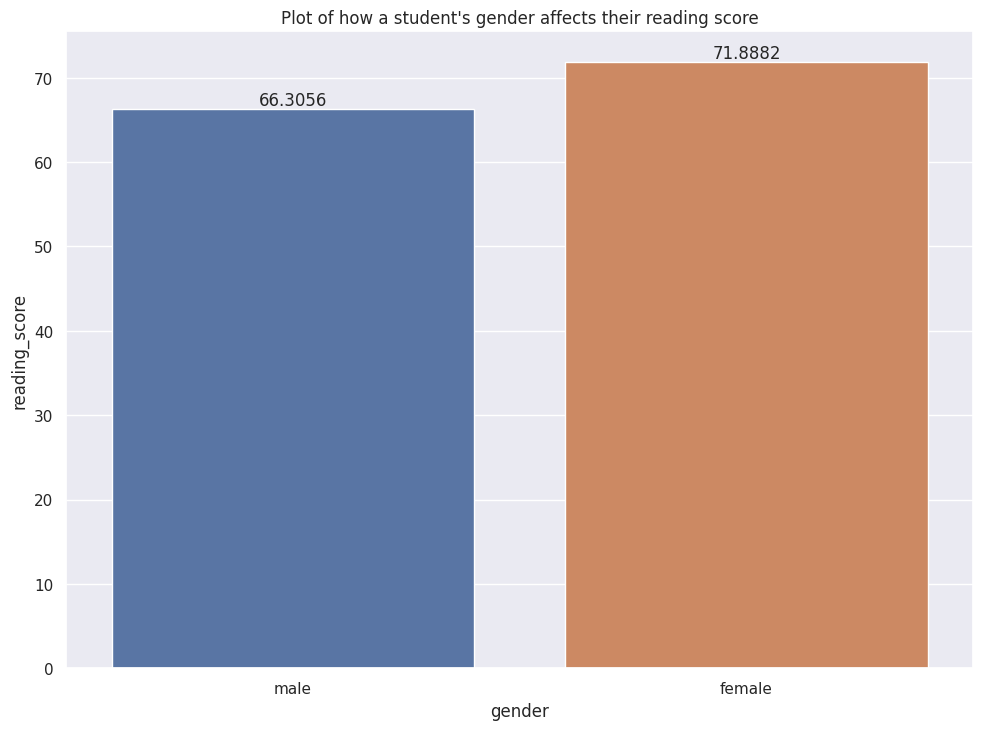

In [28]:
! rm outputs/plots/gender/gender-reading-plot.png

fig_gender_reading = sns.barplot(data=df, x='gender', y='reading_score', errorbar=None)
plt.bar_label(fig_gender_reading.containers[0])
plt.title("Plot of how a student's gender affects their reading score")
plt.savefig(f'{filepath_gender}/gender-reading-plot.png')

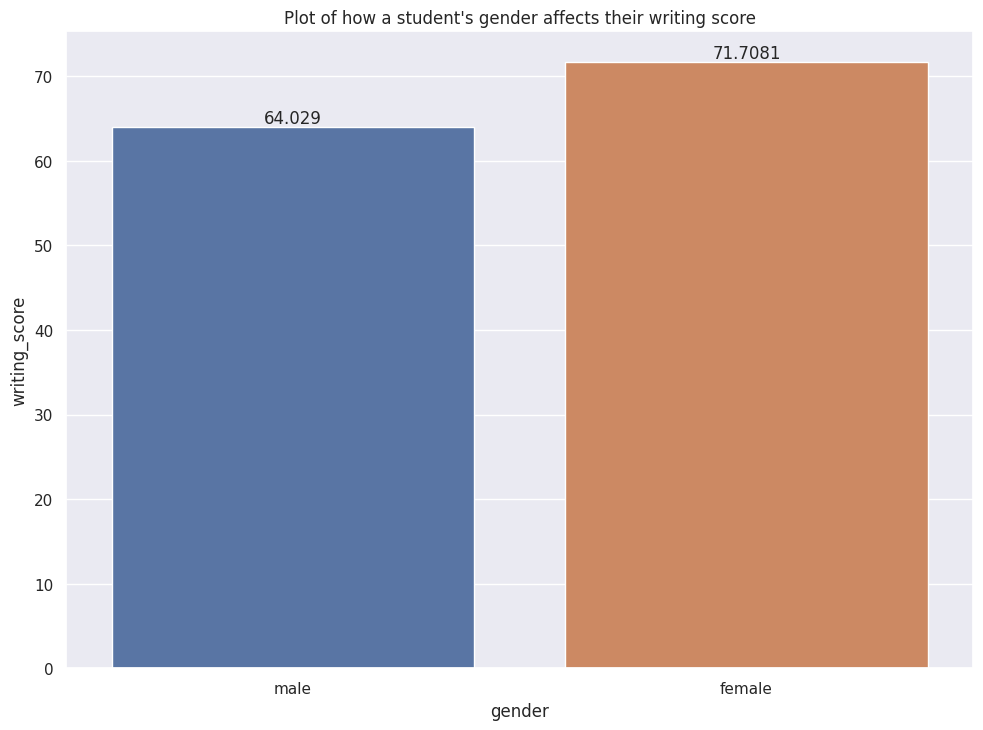

In [29]:
! rm outputs/plots/gender/gender-writing-plot.png

fig_gender_writing = sns.barplot(data=df, x='gender', y='writing_score', errorbar=None)
plt.bar_label(fig_gender_writing.containers[0])
plt.title("Plot of how a student's gender affects their writing score")
plt.savefig(f'{filepath_gender}/gender-writing-plot.png')

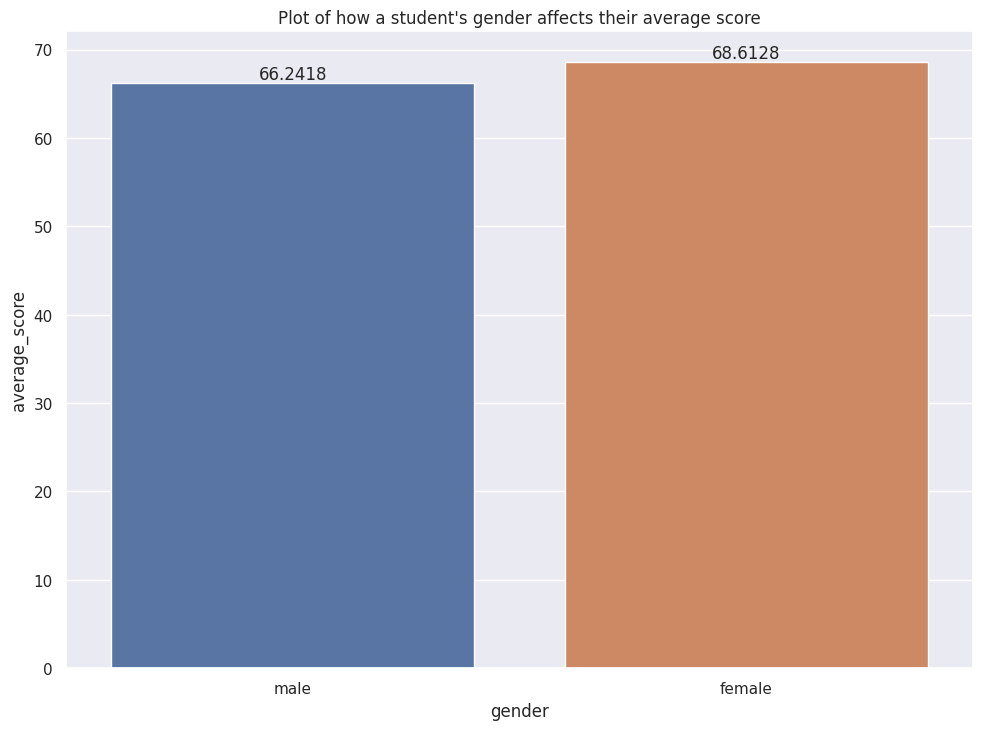

In [30]:
! rm outputs/plots/gender/gender-average-plot.png

fig_gender_average = sns.barplot(data=df, x='gender', y='average_score', errorbar=None)
plt.bar_label(fig_gender_average.containers[0])
plt.title("Plot of how a student's gender affects their average score")
plt.savefig(f'{filepath_gender}/gender-average-plot.png')

### Ethnicity - Score plots

In [31]:
try:
  os.makedirs(name='outputs/plots/ethnicity') # create outputs/plots/ethnicity folder
except Exception as e:
  print(e)

filepath_ethnicity = 'outputs/plots/ethnicity'

[Errno 17] File exists: 'outputs/plots/ethnicity'


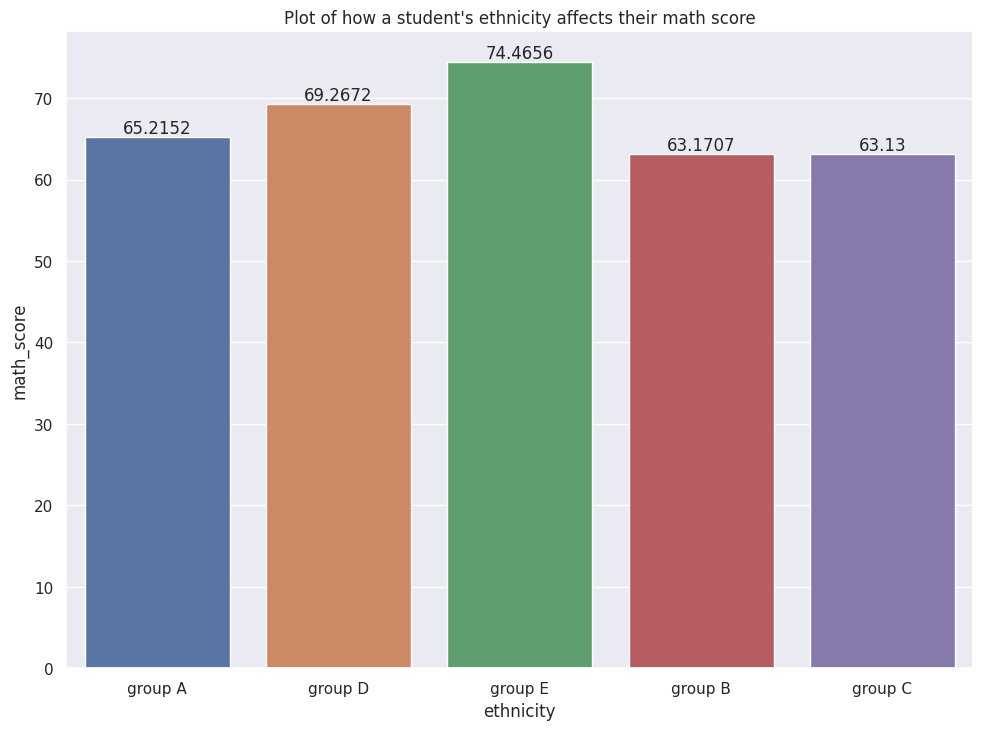

In [32]:
! rm outputs/plots/ethnicity/ethnicity-math-plot.png

fig_ethnicity_math = sns.barplot(data=df, x='ethnicity', y='math_score', errorbar=None)
plt.bar_label(fig_ethnicity_math.containers[0])
plt.title("Plot of how a student's ethnicity affects their math score")
plt.savefig(f'{filepath_ethnicity}/ethnicity-math-plot.png')

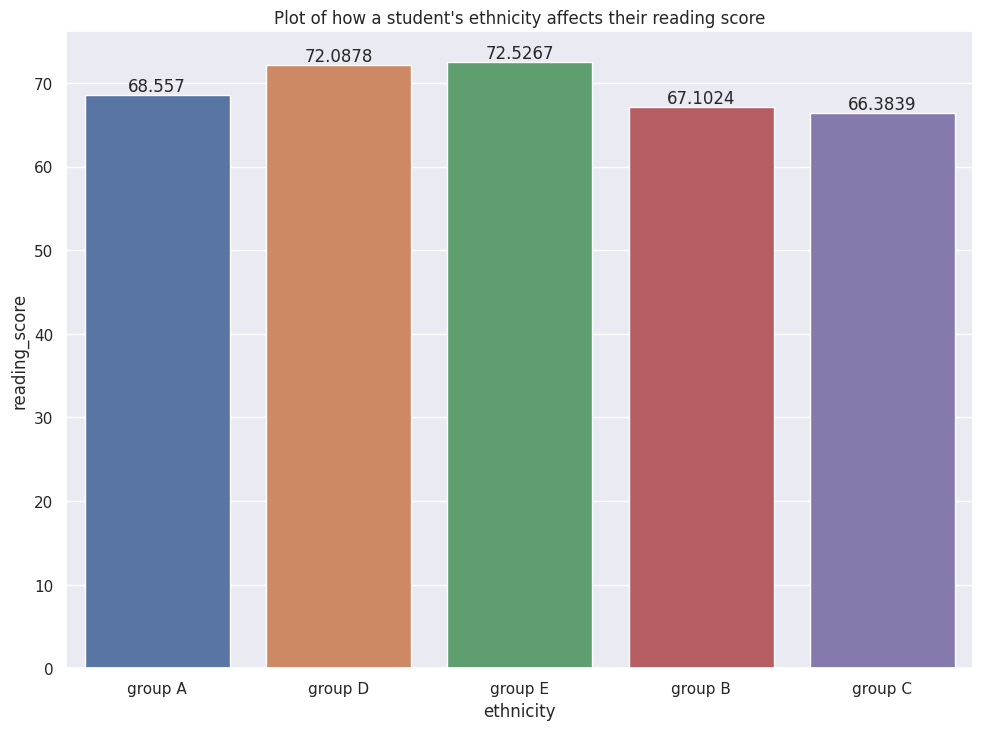

In [33]:
! rm outputs/plots/ethnicity/ethnicity-reading-plot.png

fig_ethnicity_reading = sns.barplot(data=df, x='ethnicity', y='reading_score', errorbar=None)
plt.bar_label(fig_ethnicity_reading.containers[0])
plt.title("Plot of how a student's ethnicity affects their reading score")
plt.savefig(f'{filepath_ethnicity}/ethnicity-reading-plot.png')

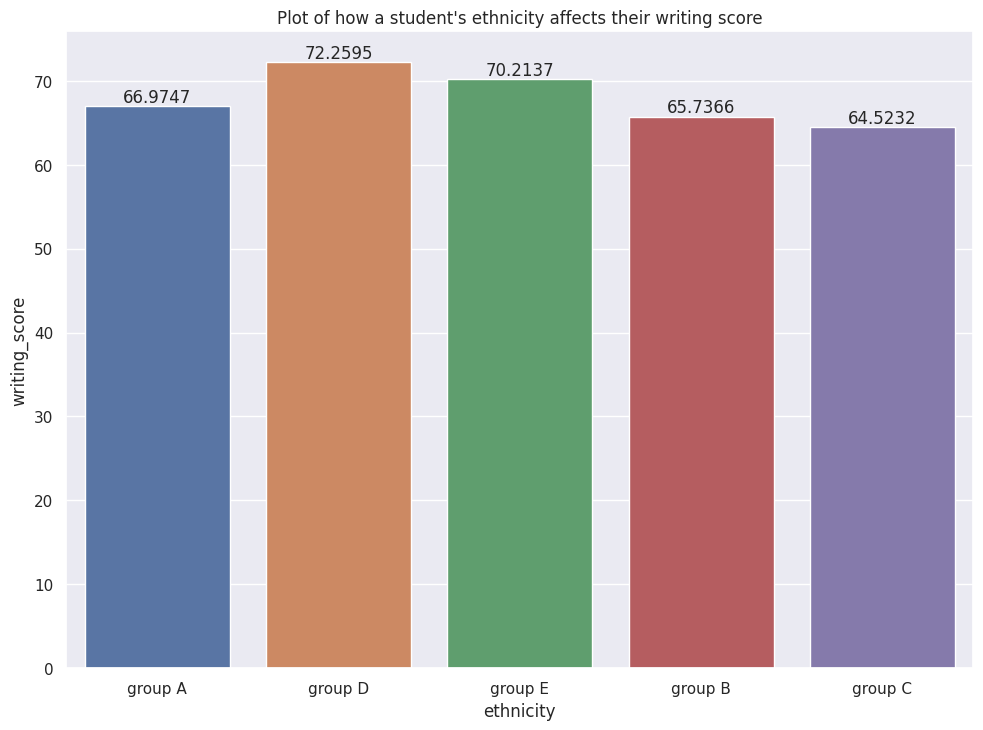

In [34]:
! rm outputs/plots/ethnicity/ethnicity-writing-plot.png

fig_ethnicity_writing = sns.barplot(data=df, x='ethnicity', y='writing_score', errorbar=None)
plt.bar_label(fig_ethnicity_writing.containers[0])
plt.title("Plot of how a student's ethnicity affects their writing score")
plt.savefig(f'{filepath_ethnicity}/ethnicity-writing-plot.png')

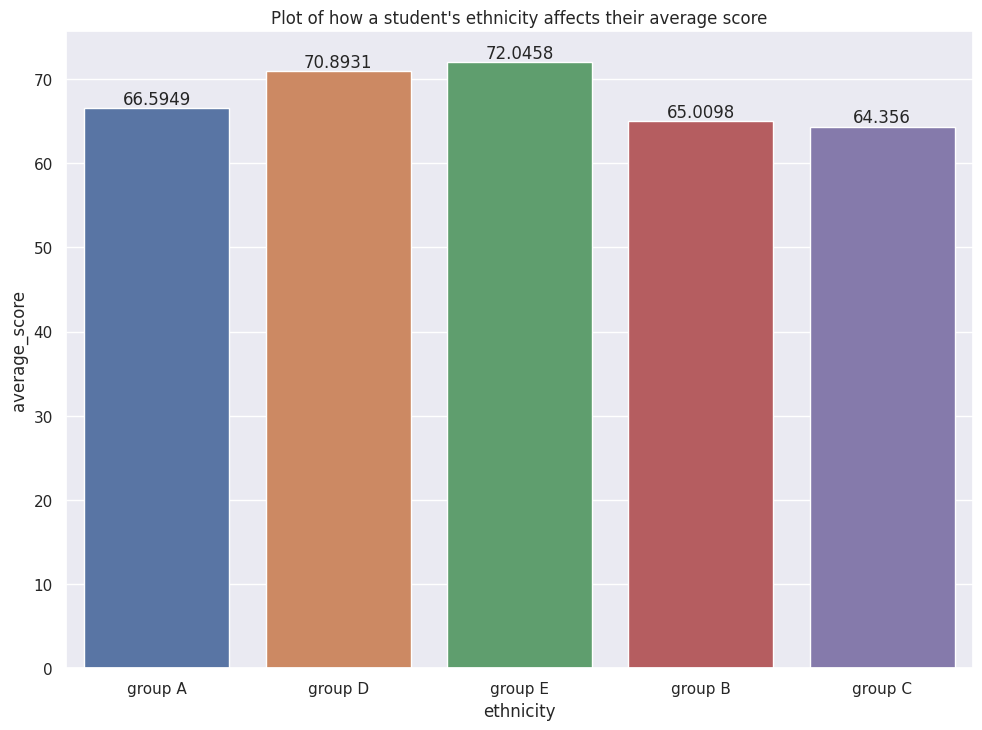

In [35]:
! rm outputs/plots/ethnicity/ethnicity-average-plot.png

fig_ethnicity_average = sns.barplot(data=df, x='ethnicity', y='average_score', errorbar=None)
plt.bar_label(fig_ethnicity_average.containers[0])
plt.title("Plot of how a student's ethnicity affects their average score")
plt.savefig(f'{filepath_ethnicity}/ethnicity-average-plot.png')

### Parental education - Score plots

In [36]:
try:
  os.makedirs(name='outputs/plots/parental-education') # create outputs/plots/parental-education folder
except Exception as e:
  print(e)

filepath_parental_education = 'outputs/plots/parental-education'

[Errno 17] File exists: 'outputs/plots/parental-education'


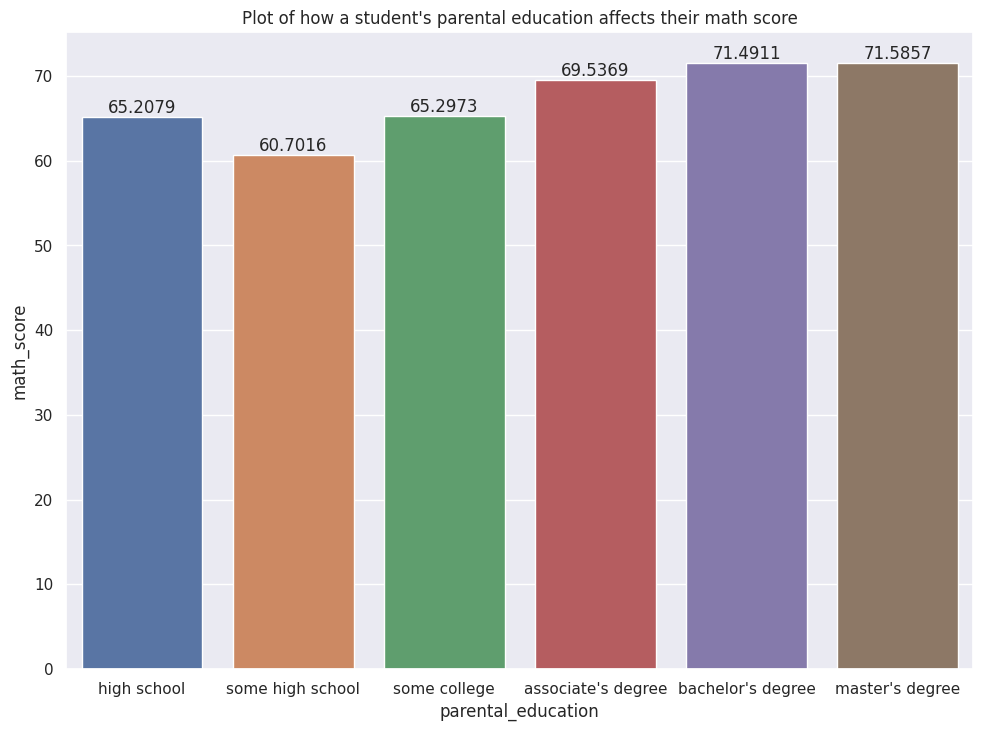

In [37]:
! rm outputs/plots/parental-education/parental-education-math-plot.png

fig_parental_education_math = sns.barplot(data=df, x='parental_education', y='math_score', errorbar=None)
plt.bar_label(fig_parental_education_math.containers[0])
plt.title("Plot of how a student's parental education affects their math score")
plt.savefig(f'{filepath_parental_education}/parental-education-math-plot.png')

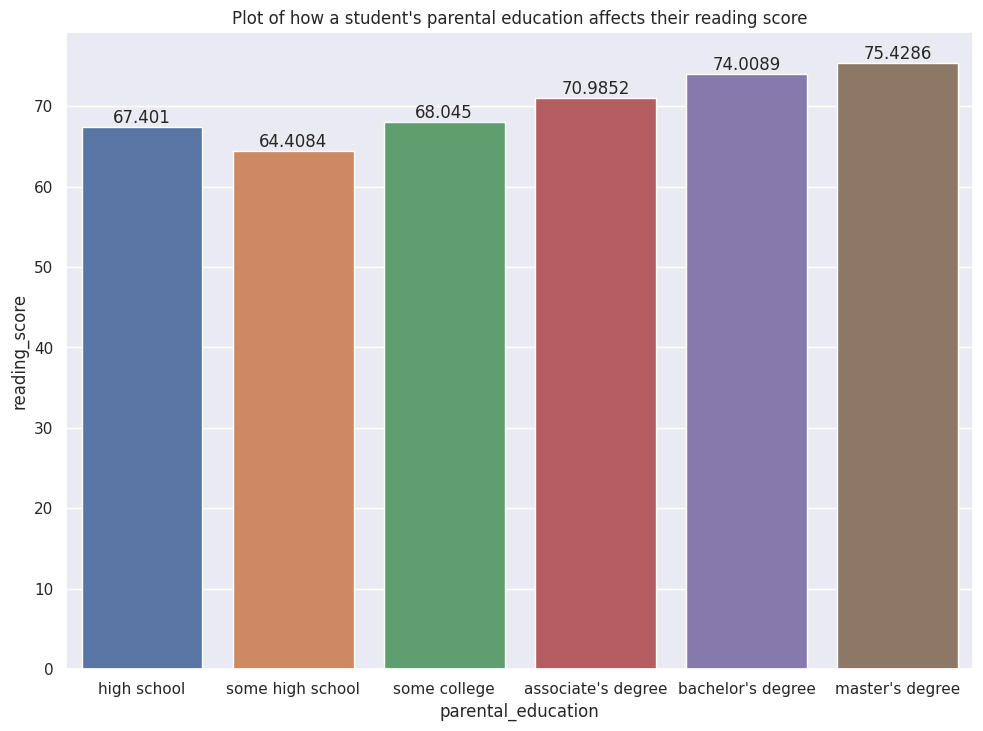

In [38]:
! rm outputs/plots/parental-education/parental-education-reading-plot.png

fig_parental_education_reading = sns.barplot(data=df, x='parental_education', y='reading_score', errorbar=None)
plt.bar_label(fig_parental_education_reading.containers[0])
plt.title("Plot of how a student's parental education affects their reading score")
plt.savefig(f'{filepath_parental_education}/parental-education-reading-plot.png')

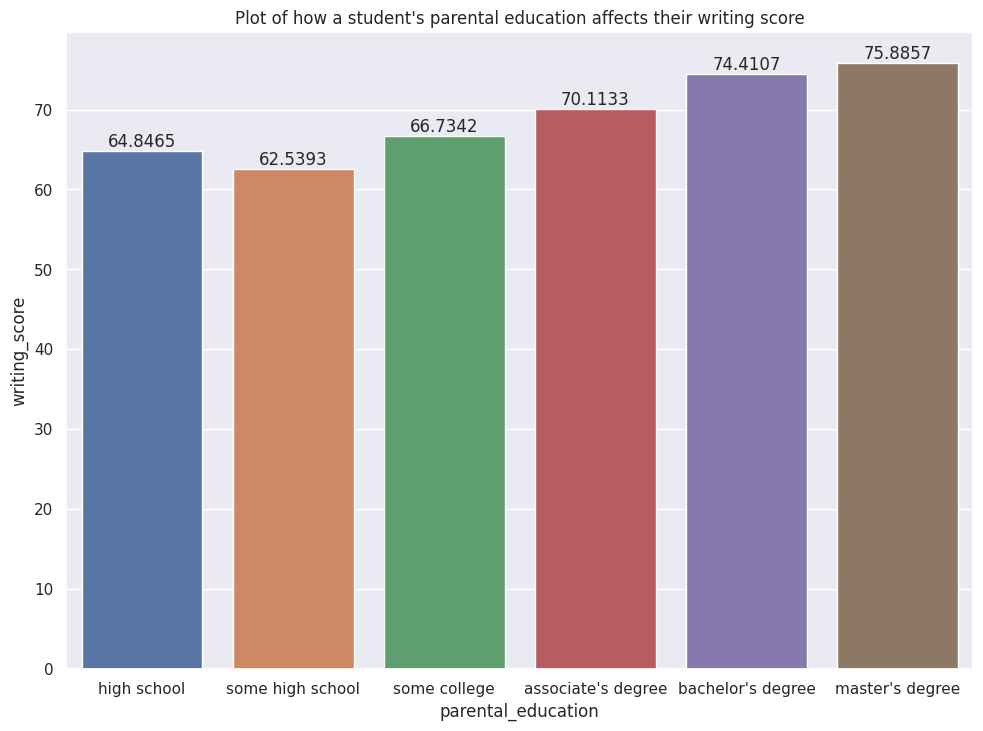

In [39]:
! rm outputs/plots/parental-education/parental-education-writing-plot.png

fig_parental_education_writing = sns.barplot(data=df, x='parental_education', y='writing_score', errorbar=None)
plt.bar_label(fig_parental_education_writing.containers[0])
plt.title("Plot of how a student's parental education affects their writing score")
plt.savefig(f'{filepath_parental_education}/parental-education-writing-plot.png')

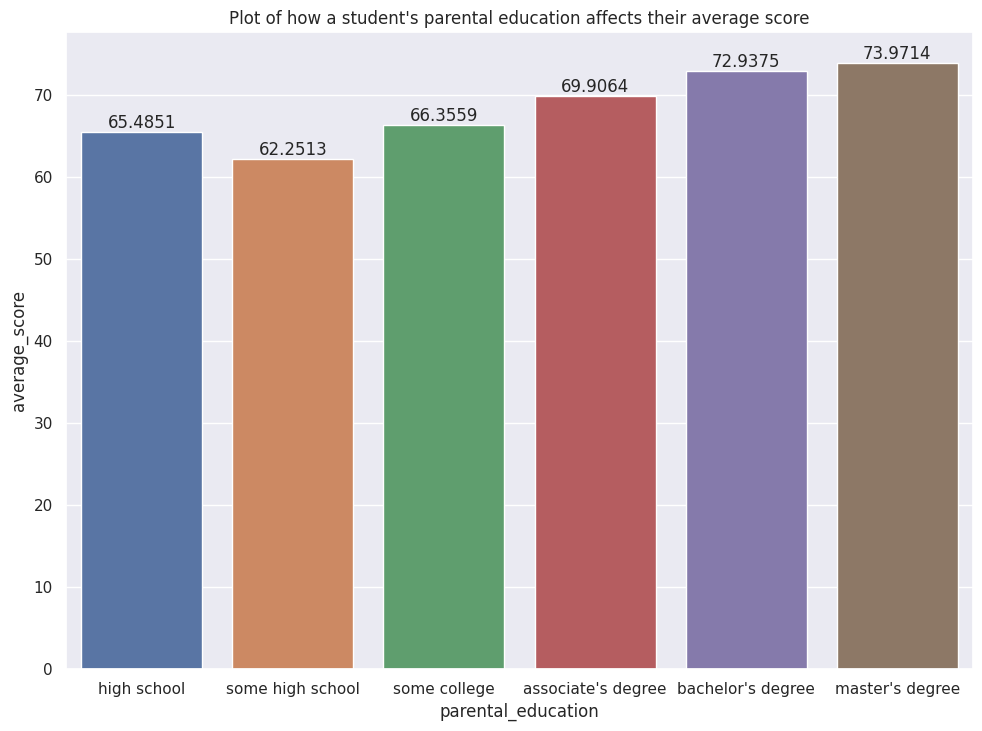

In [40]:
! rm outputs/plots/parental-education/parental-education-average-plot.png

fig_parental_education_average = sns.barplot(data=df, x='parental_education', y='average_score', errorbar=None)
plt.bar_label(fig_parental_education_average.containers[0])
plt.title("Plot of how a student's parental education affects their average score")
plt.savefig(f'{filepath_parental_education}/parental-education-average-plot.png')

### Lunch Program - Score plots

In [41]:
try:
  os.makedirs(name='outputs/plots/lunch-program') # create outputs/plots/lunch-program folder
except Exception as e:
  print(e)

filepath_lunch_program = 'outputs/plots/lunch-program'

[Errno 17] File exists: 'outputs/plots/lunch-program'


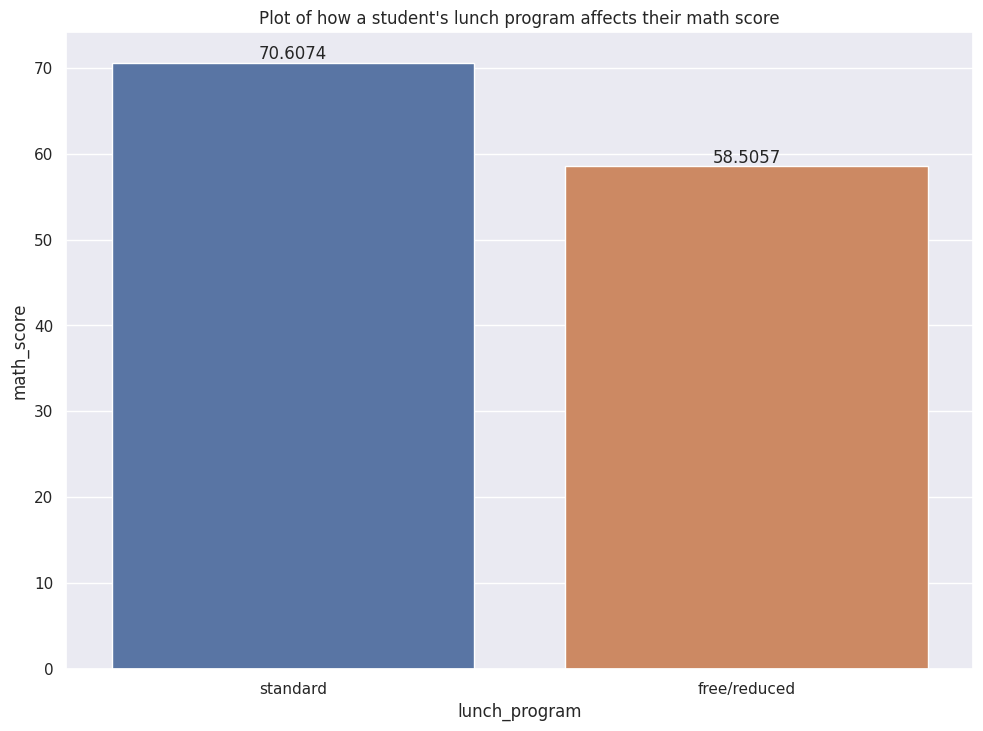

In [42]:
! rm outputs/plots/lunch-program/lunch-program-math-plot.png

fig_lunch_program_math = sns.barplot(data=df, x='lunch_program', y='math_score', errorbar=None)
plt.bar_label(fig_lunch_program_math.containers[0])
plt.title("Plot of how a student's lunch program affects their math score")
plt.savefig(f'{filepath_lunch_program}/lunch-program-math-plot.png')

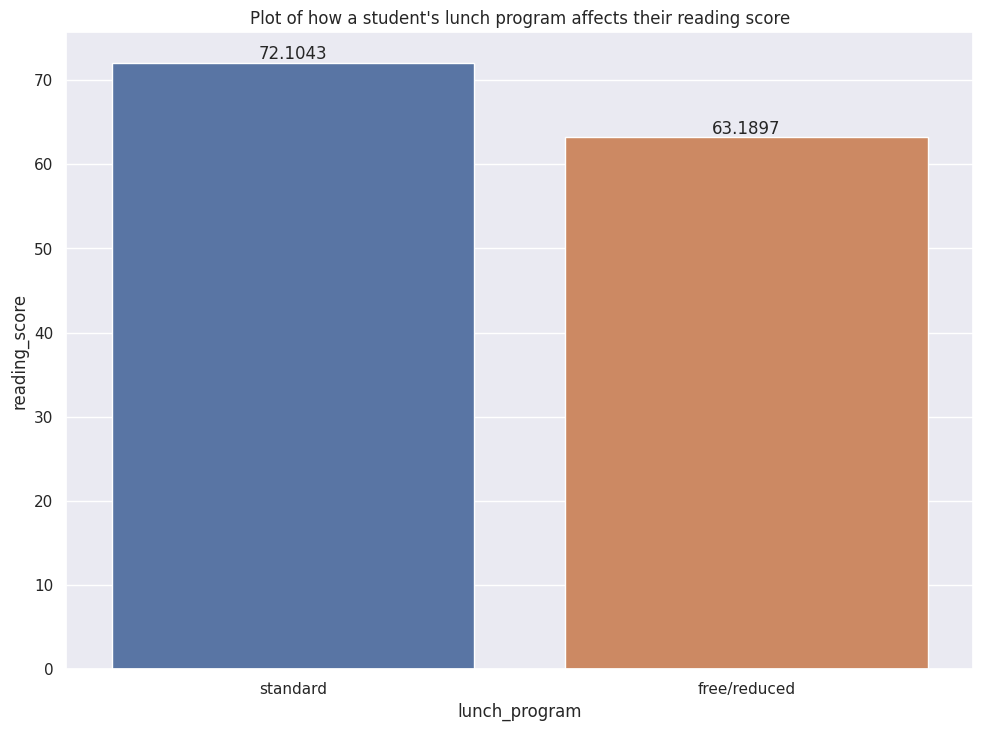

In [43]:
! rm outputs/plots/lunch-program/lunch-program-reading-plot.png

fig_lunch_program_reading = sns.barplot(data=df, x='lunch_program', y='reading_score', errorbar=None)
plt.bar_label(fig_lunch_program_reading.containers[0])
plt.title("Plot of how a student's lunch program affects their reading score")
plt.savefig(f'{filepath_lunch_program}/lunch-program-reading-plot.png')

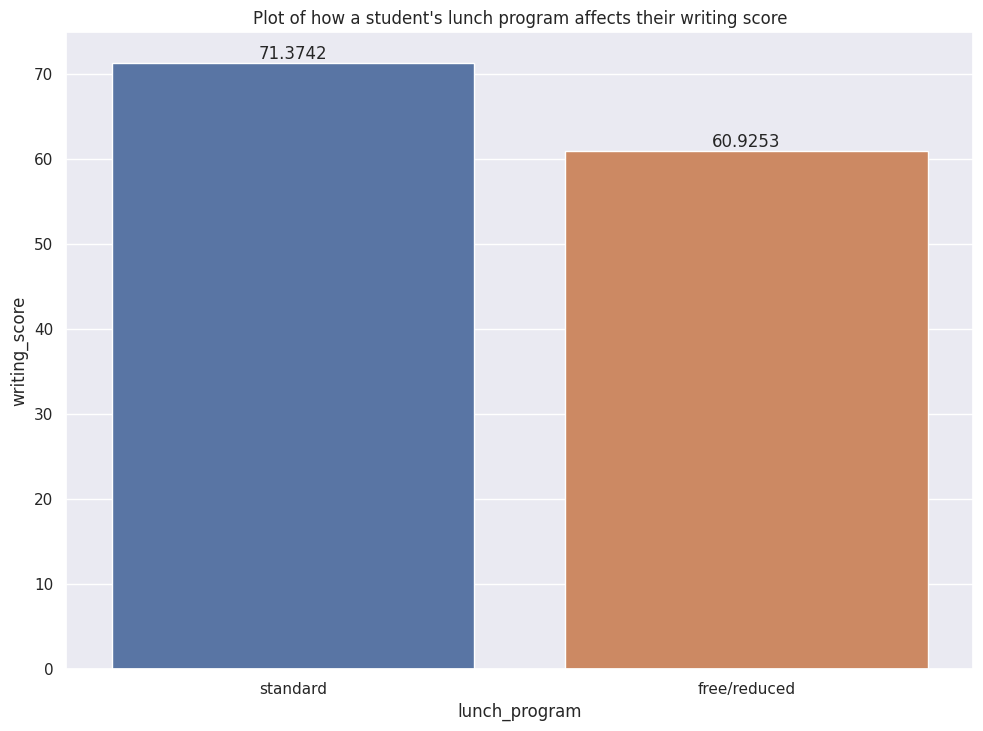

In [44]:
! rm outputs/plots/lunch-program/lunch-program-writing-plot.png

fig_lunch_program_writing = sns.barplot(data=df, x='lunch_program', y='writing_score', errorbar=None)
plt.bar_label(fig_lunch_program_writing.containers[0])
plt.title("Plot of how a student's lunch program affects their writing score")
plt.savefig(f'{filepath_lunch_program}/lunch-program-writing-plot.png')

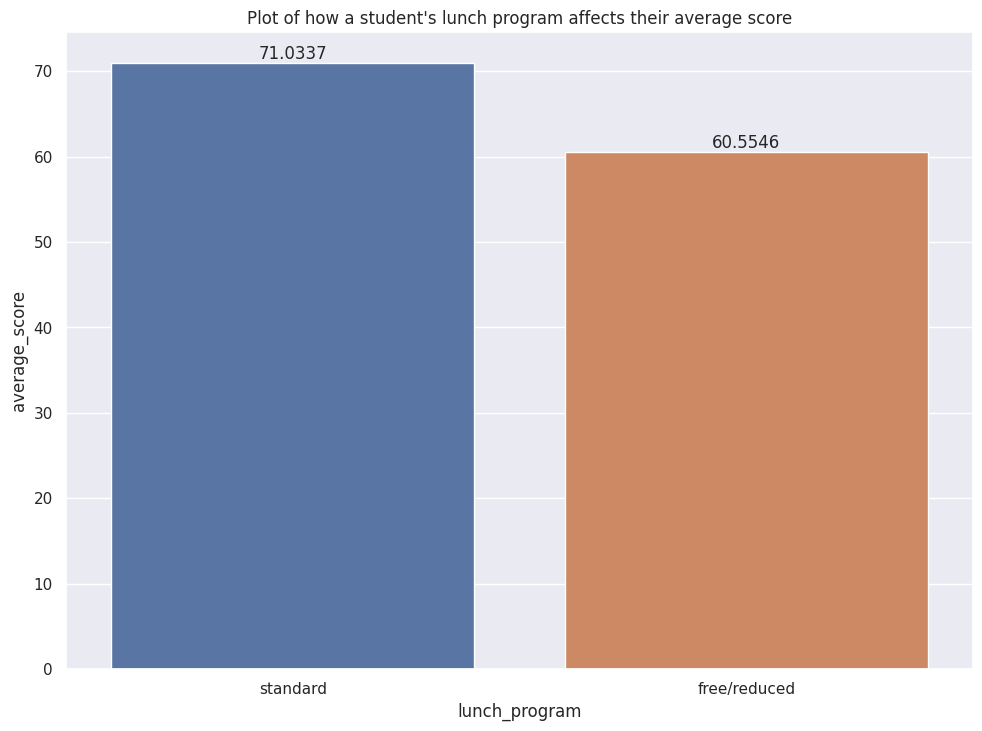

In [45]:
! rm outputs/plots/lunch-program/lunch-program-average-plot.png

fig_lunch_program_average = sns.barplot(data=df, x='lunch_program', y='average_score', errorbar=None)
plt.bar_label(fig_lunch_program_average.containers[0])
plt.title("Plot of how a student's lunch program affects their average score")
plt.savefig(f'{filepath_lunch_program}/lunch-program-average-plot.png')

### Test Preparation Course - Score plots

In [46]:
try:
  os.makedirs(name='outputs/plots/test-prep-course') # create outputs/plots/test-prep-course folder
except Exception as e:
  print(e)

filepath_test_prep_course = 'outputs/plots/test-prep-course'

[Errno 17] File exists: 'outputs/plots/test-prep-course'


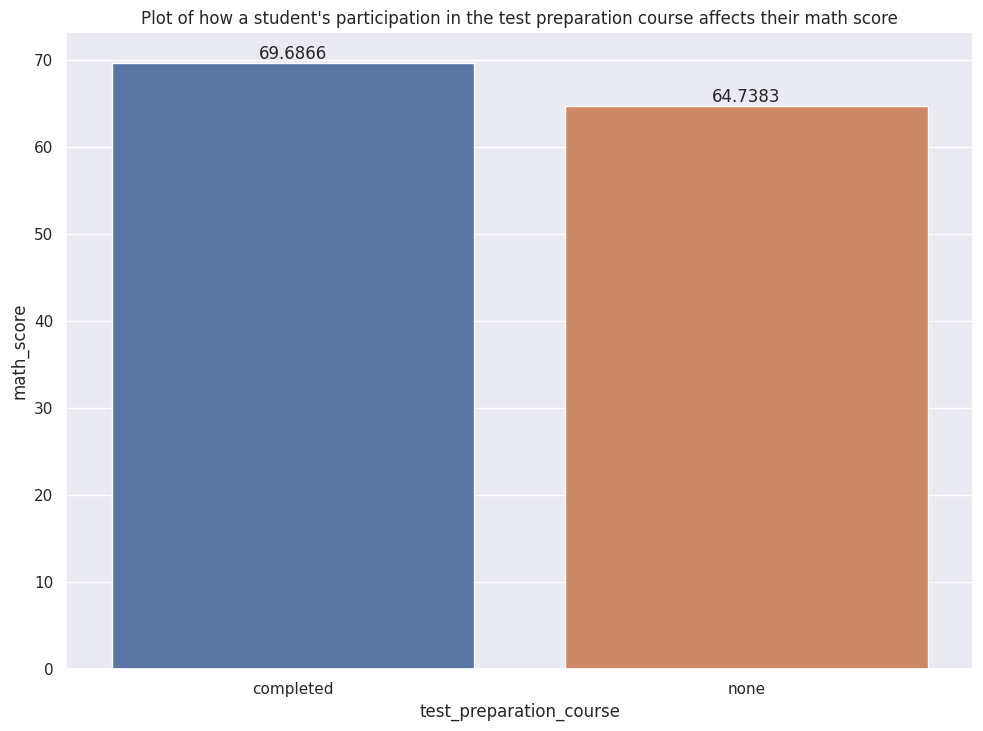

In [47]:
! rm outputs/plots/test-prep-course/test-prep-course-math-plot.png

fig_test_prep_course_math = sns.barplot(data=df, x='test_preparation_course', y='math_score', errorbar=None)
plt.bar_label(fig_test_prep_course_math.containers[0])
plt.title("Plot of how a student's participation in the test preparation course affects their math score")
plt.savefig(f'{filepath_test_prep_course}/test-prep-course-math-plot.png')

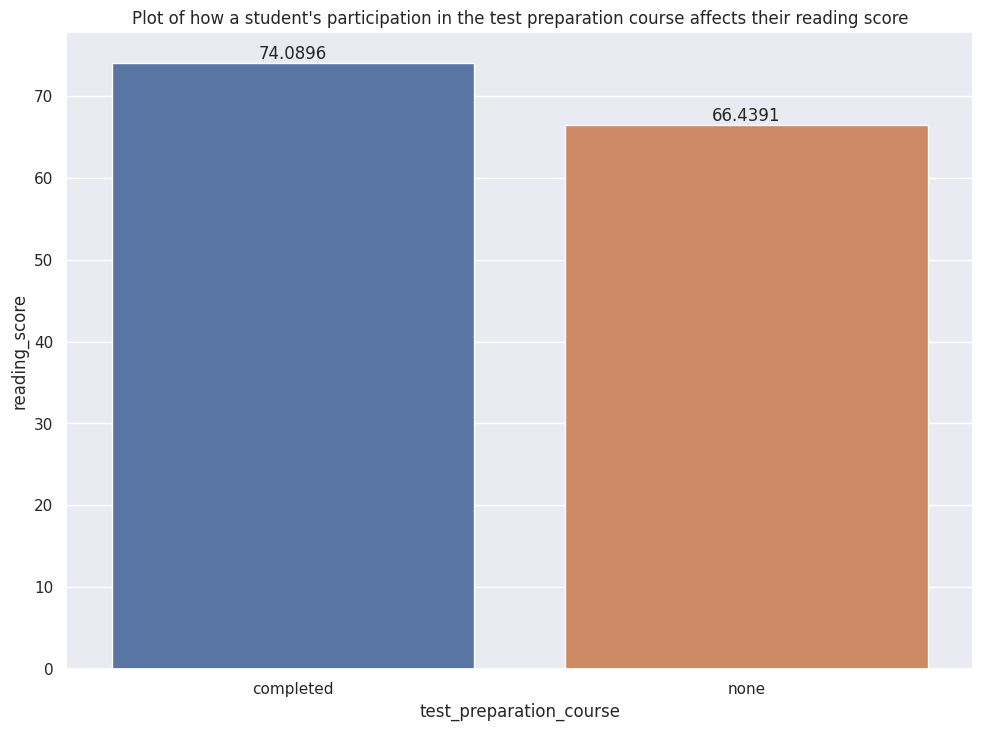

In [48]:
! rm outputs/plots/test-prep-course/test-prep-course-reading-plot.png

fig_test_prep_course_reading = sns.barplot(data=df, x='test_preparation_course', y='reading_score', errorbar=None)
plt.bar_label(fig_test_prep_course_reading.containers[0])
plt.title("Plot of how a student's participation in the test preparation course affects their reading score")
plt.savefig(f'{filepath_test_prep_course}/test-prep-course-reading-plot.png')

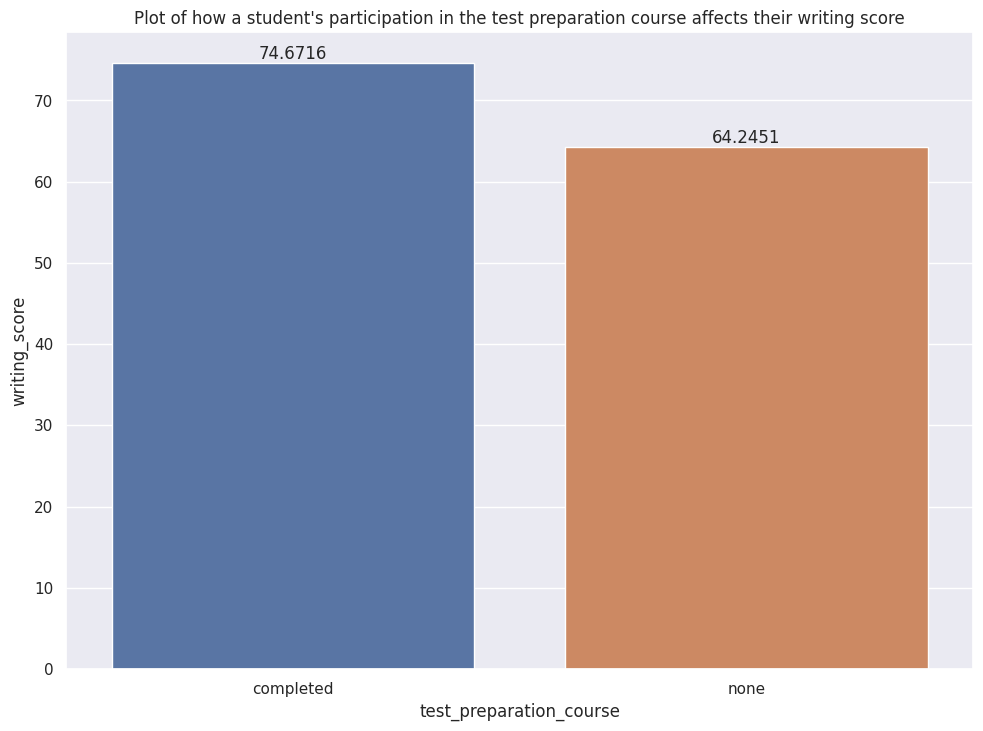

In [49]:
! rm outputs/plots/test-prep-course/test-prep-course-writing-plot.png

fig_test_prep_course_writing = sns.barplot(data=df, x='test_preparation_course', y='writing_score', errorbar=None)
plt.bar_label(fig_test_prep_course_writing.containers[0])
plt.title("Plot of how a student's participation in the test preparation course affects their writing score")
plt.savefig(f'{filepath_test_prep_course}/test-prep-course-writing-plot.png')

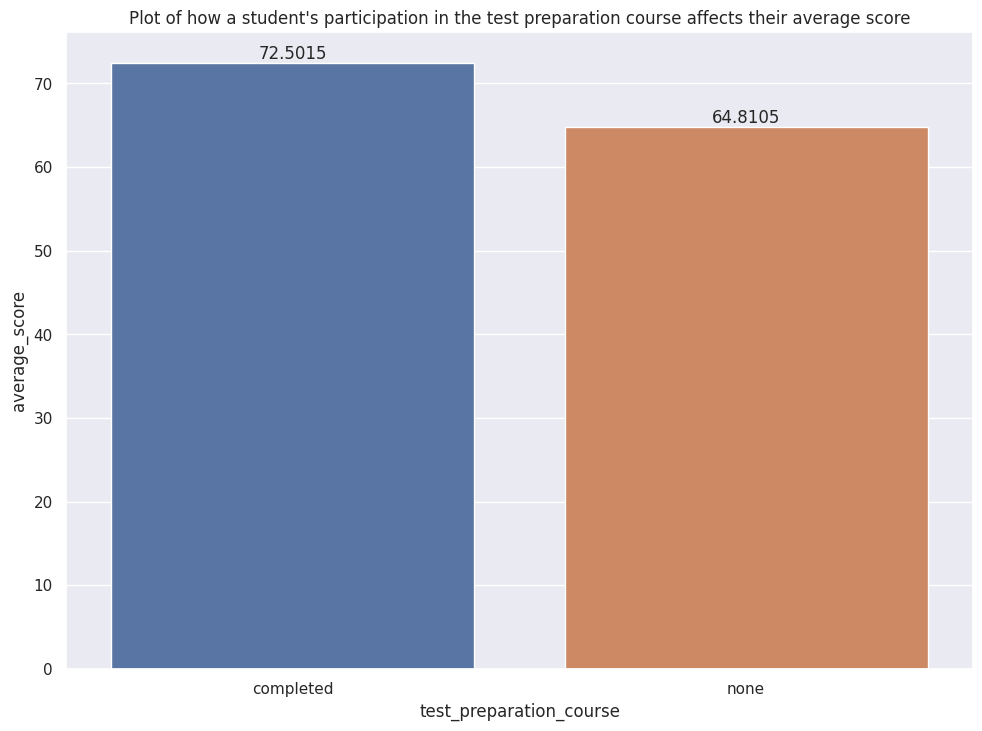

In [50]:
! rm outputs/plots/test-prep-course/test-prep-course-average-plot.png

fig_test_prep_course_average = sns.barplot(data=df, x='test_preparation_course', y='average_score', errorbar=None)
plt.bar_label(fig_test_prep_course_average.containers[0])
plt.title("Plot of how a student's participation in the test preparation course affects their average score")
plt.savefig(f'{filepath_test_prep_course}/test-prep-course-average-plot.png')

Excellent, all of the plots have been saved for later use. In the next notebook, we will begin to validate the secondary hypotheses - that relationships exist within the categorical feature variables themselves.